In [1]:
from sklearn.metrics import normalized_mutual_info_score, accuracy_score
import numpy as np
import torch
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
import re
import seaborn as sns

In [2]:
import matplotlib
# Set Arial as the font
matplotlib.rcParams['font.family'] = 'Arial'

In [3]:
purity = 1.0
coverage = 100
# general_folder_gmm = f"./new_model/results/p_{str(purity).replace('.', '')}_cov_{coverage}/"
general_folder_gmm = f"./final_our_model/results/p_{str(purity).replace('.', '')}_cov_{coverage}/"
general_folder_pyclone = f"./pyclone/results/p_{str(purity).replace('.', '')}_cov_{coverage}/"

N_values = [5000, 10000, 15000]
K_values = [4, 6, 8]
D_values = [2, 3, 4]

# NMI

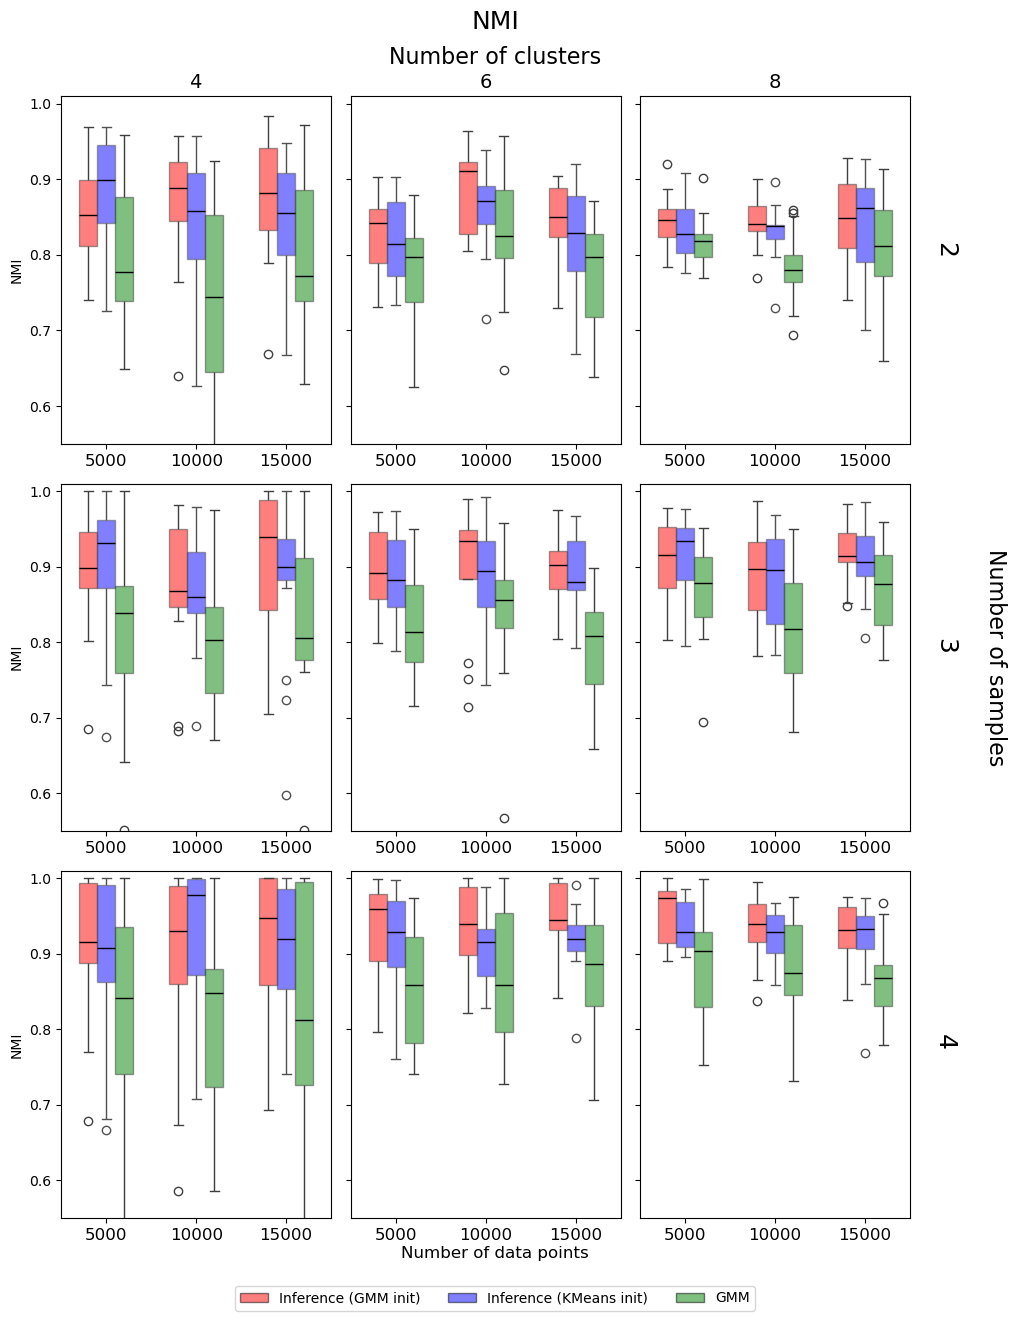

In [53]:
nmi_gmm = []
nmi_kmeans = []
nmi_gmm_init = []
def read_nmi_file(filename):
    try:
        with open(filename, 'r') as file:
            nmi_values = [float(line.strip()) for line in file.readlines()]
        return nmi_values
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        return []

for N in N_values:
    for K in K_values:
        for D in D_values:
            # Construct the filename based on the pattern
            if D == 2:
                filename = os.path.join(general_folder_gmm, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_gmm, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_gmm, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_gmm = read_nmi_file(filename)
            if nmi_values_gmm:
                for nmi in nmi_values_gmm:
                    nmi_gmm.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
            if D == 2:
                filename = os.path.join(general_folder_kmeans, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_kmeans, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_kmeans, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_kmeans = read_nmi_file(filename)
            if nmi_values_kmeans:
                for nmi in nmi_values_kmeans:
                    nmi_kmeans.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })

            if D == 2:
                filename = os.path.join(general_folder_gmm, f"D_2/init_nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_gmm, f"D_3/init_nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_gmm, f"D_4/init_nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_gmm_init = read_nmi_file(filename)
            if nmi_values_gmm_init:
                for nmi in nmi_values_gmm_init:
                    nmi_gmm_init.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
df_gmm = pd.DataFrame(nmi_gmm)
df_gmm_init = pd.DataFrame(nmi_gmm_init)
df_kmeans = pd.DataFrame(nmi_kmeans)
# df
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)
axes = axes.flatten()
for i, (D) in enumerate(D_values):
    for j, (K) in enumerate(K_values):
        ax = axes[i * 3 + j]
        subset_gmm = df_gmm[(df_gmm['K'] == K) & (df_gmm['D'] == D)]
        subset_kmeans = df_kmeans[(df_kmeans['K'] == K) & (df_kmeans['D'] == D)]
        subset_gmm_init = df_gmm_init[(df_gmm_init['K'] == K) & (df_gmm_init['D'] == D)]
        
        # Calculate the unique values of N
        unique_n_values = subset_gmm['N'].unique()
        # n_positions_gmm = range(len(unique_n_values))
        n_positions_gmm = [pos - 0.2 for pos in range(len(unique_n_values))]
        n_positions_kmeans = [pos + 0.2 for pos in n_positions_gmm]
        n_positions_gmm_init = [pos + 0.2 for pos in n_positions_kmeans]
        

        # Create the boxplot for GMM with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_gmm, ax=ax,
            positions=n_positions_gmm,
            boxprops=dict(facecolor='red', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )

        # Create the boxplot for KMeans with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_kmeans, ax=ax,
            positions=n_positions_kmeans,
            boxprops=dict(facecolor='blue', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )
        # Create the boxplot for KMeans with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_gmm_init, ax=ax,
            positions=n_positions_gmm_init,
            boxprops=dict(facecolor='green', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )
        
        # Set custom x-tick labels for the combined plot
        ax.set_xticks([pos + 0.2 for pos in n_positions_gmm])  # Center the labels
        ax.set_xticklabels(
            ['5000',  '10000',  '15000'], fontsize=12
        )
        ax.set_xlabel('')
        ax.set_ylabel('NMI')

for i, K in enumerate(K_values):
    axes[1*i].set_title(f'{K}', fontsize=14)

# For the right column: Number of samples (D = 2, 3, 4)
for i, D in enumerate(D_values):
    # Position each D label on the right side of the subplots, vertically
    fig.text(0.95, 0.84 - i * 0.33, f'{D}', va='center', ha='center', rotation=-90, fontsize=18)

plt.ylim([0.55, 1.01])
fig.text(0.5, 1.03, 'NMI', ha='center', va='center', fontsize=18)
fig.text(0.5, 1., 'Number of clusters', ha='center', va='center', fontsize=16)
fig.text(1., 0.5, 'Number of samples', ha='center', va='center', rotation=-90, fontsize=16)
fig.text(0.5, 0.00001, 'Number of data points', ha='center', fontsize=12)
# plt.savefig('nmi_gmm.pdf', format='pdf')
# plt.savefig('nmi_gmm.png')

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Inference (GMM init)'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Inference (KMeans init)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='GMM')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

# Distribution accuracy per cluster

In [3]:
def compute_pairwise_nmi(true_labels, predicted_labels, threshold=0.5):
    unique_true = np.unique(np.array(true_labels, dtype = 'int'))
    unique_pred = np.unique(predicted_labels)
    # Initialize mapping and NMI matrix
    nmi_matrix = np.zeros((len(unique_true), len(unique_pred)))
    label_mapping = {}
    
    # Construct pairwise NMI matrix
    # Rows: true labels, Columns: predicted labels
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            true_mask = (true_labels == true_label).astype(int)
            pred_mask = (predicted_labels == pred_label).astype(int)
            
            nmi_matrix[i, j] = normalized_mutual_info_score(true_mask, pred_mask)
    
    # Select the best matching predicted label for each true label
    for i, true_label in enumerate(unique_true):
        best_pred_index = np.argmax(nmi_matrix[i, :])  # Index of the best match (i.e. column)
        best_nmi = nmi_matrix[i, best_pred_index]

        if best_nmi >= threshold:
            label_mapping[true_label] = unique_pred[best_pred_index]

    return label_mapping, nmi_matrix  

GMM final inference

In [29]:
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_gmm = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_labels = df_data['True_cluster'].tolist()
                pred_labels = df_data['Pred_cluster'].tolist()

                nmi_threshold = 0.3 # 0.4
                label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                # print(label_mapping)
                true_labels_match = list(label_mapping.keys())
                # print(true_labels_match)
                pred_labels_match = list(label_mapping.values())
                # print(pred_labels_match)

                # Extract true and predicted distributions from the csv
                true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                true_dist = torch.tensor(true_dist, dtype=torch.int)
                pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                
                first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                # print(first_occurrence_indices_true)
                true_dist_match = true_dist[first_occurrence_indices_true]
                # print(true_dist_cluster)
                
                first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                # print(first_occurrence_indices_pred)
                pred_dist_match = pred_dist[first_occurrence_indices_pred]
                # print(pred_dist_cluster)

                # Flatten the arrays
                true_dist_match = true_dist_match.ravel()
                pred_dist_match = pred_dist_match.ravel()
                accuracy = accuracy_score(true_dist_match, pred_dist_match)
                accuracy_gmm[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

KMeans final inference

In [30]:
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_kmeans = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_kmeans + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_labels = df_data['True_cluster'].tolist()
                pred_labels = df_data['Pred_cluster'].tolist()

                nmi_threshold = 0.3 # 0.4
                label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                # print(label_mapping)
                true_labels_match = list(label_mapping.keys())
                # print(true_labels_match)
                pred_labels_match = list(label_mapping.values())
                # print(pred_labels_match)

                # Extract true and predicted distributions from the csv
                true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                true_dist = torch.tensor(true_dist, dtype=torch.int)
                pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                
                first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                # print(first_occurrence_indices_true)
                true_dist_match = true_dist[first_occurrence_indices_true]
                # print(true_dist_cluster)
                
                first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                # print(first_occurrence_indices_pred)
                pred_dist_match = pred_dist[first_occurrence_indices_pred]
                # print(pred_dist_cluster)

                # Flatten the arrays
                true_dist_match = true_dist_match.ravel()
                pred_dist_match = pred_dist_match.ravel()
                accuracy = accuracy_score(true_dist_match, pred_dist_match)
                accuracy_kmeans[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

GMM init

In [48]:
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_gmm_init = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/init_csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_labels = df_data['True_cluster'].tolist()
                pred_labels = df_data['Pred_cluster'].tolist()

                nmi_threshold = 0.3 # 0.4
                label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                # print(label_mapping)
                true_labels_match = list(label_mapping.keys())
                # print(true_labels_match)
                pred_labels_match = list(label_mapping.values())
                # print(pred_labels_match)

                # Extract true and predicted distributions from the csv
                true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                true_dist = torch.tensor(true_dist, dtype=torch.int)
                pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                
                first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                # print(first_occurrence_indices_true)
                true_dist_match = true_dist[first_occurrence_indices_true]
                # print(true_dist_cluster)
                
                first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                # print(first_occurrence_indices_pred)
                pred_dist_match = pred_dist[first_occurrence_indices_pred]
                # print(pred_dist_cluster)

                # Flatten the arrays
                true_dist_match = true_dist_match.ravel()
                pred_dist_match = pred_dist_match.ravel()
                accuracy = accuracy_score(true_dist_match, pred_dist_match)
                accuracy_gmm_init[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

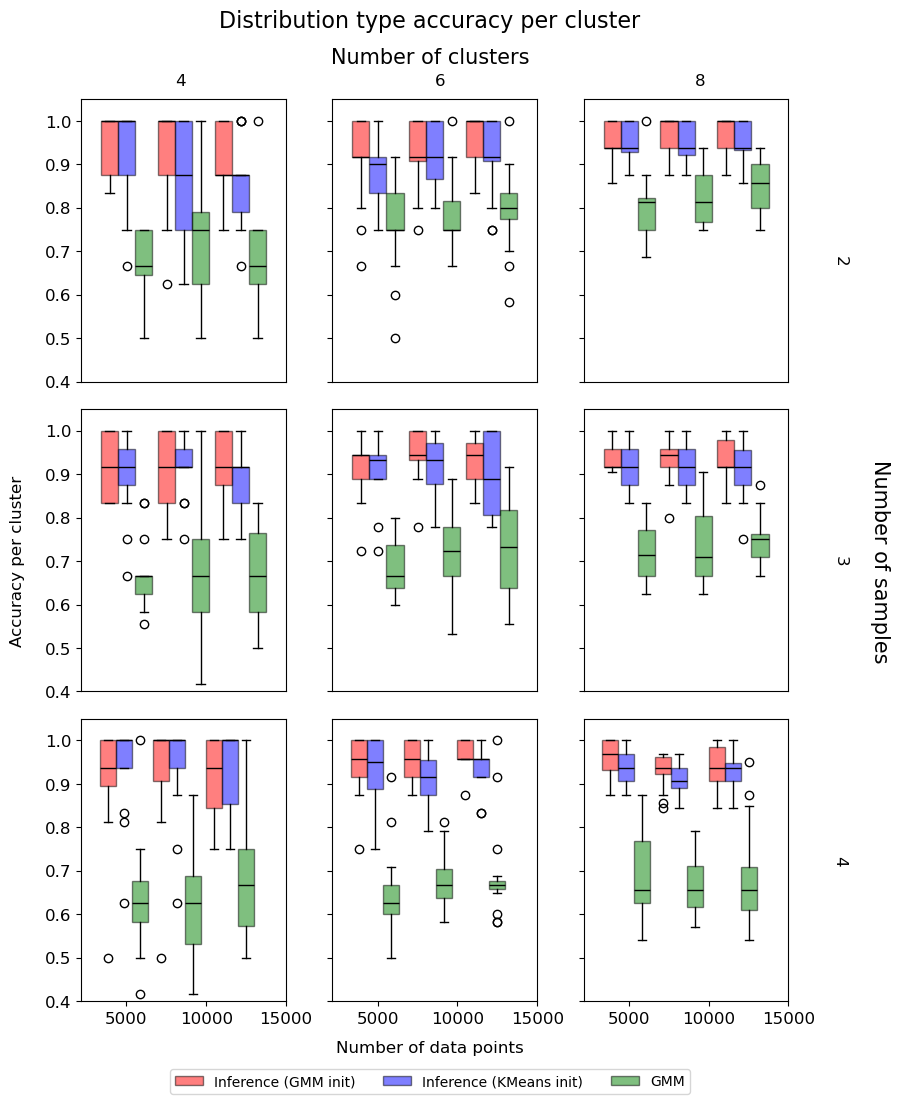

In [ ]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_gmm = []
        all_metrics_kmeans = []
        all_metrics_gmm_init = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(accuracy_gmm.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm.append(metrics_gmm)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_kmeans = np.array(accuracy_kmeans.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_kmeans.append(metrics_kmeans)

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm_init = np.array(accuracy_gmm_init.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm_init.append(metrics_gmm_init)

        if any(metrics.size > 0 for metrics in all_metrics_gmm + all_metrics_kmeans):
            # Adjusted positions for six boxplots
            # n_positions_gmm = np.arange(len(N_values)) - 0.1
            # n_positions_kmeans = n_positions_gmm + 0.3
            # n_positions_gmm_init = n_positions_kmeans + 0.3
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_gmm = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_kmeans = base_positions  # KMeans boxplots centered
            n_positions_gmm_init = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for GMM
            box_gmm = ax.boxplot(
                all_metrics_gmm, 
                positions=n_positions_gmm, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for KMeans
            box_kmeans = ax.boxplot(
                all_metrics_kmeans, 
                positions=n_positions_kmeans, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_kmeans['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_kmeans['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for GMM init
            box_gmm_init = ax.boxplot(
                all_metrics_gmm_init, 
                positions=n_positions_gmm_init, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm_init['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm_init['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # # Add scatter points for individual data points (GMM)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_gmm, n_positions_gmm)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # # Add scatter points for individual data points (KMeans)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_kmeans, n_positions_kmeans)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                ax.set_xticks((n_positions_gmm + n_positions_kmeans + n_positions_gmm_init) / 3)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per cluster', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per cluster', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Inference (GMM init)'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Inference (KMeans init)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='GMM')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.4, 1.05])
plt.show()


# Distribution accuracy per single data point

In [3]:
# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

# Placeholder for metrics for all combinations of N and K
acc_data_points_gmm_init = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/init_csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                true_dist = true_dist.ravel()
                pred_dist = pred_dist.ravel()
                accuracy_data_points = accuracy_score(true_dist, pred_dist)
                # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])

                acc_data_points_gmm_init[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

In [4]:
# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

# Placeholder for metrics for all combinations of N and K
acc_data_points_gmm = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                true_dist = true_dist.ravel()
                pred_dist = pred_dist.ravel()
                accuracy_data_points = accuracy_score(true_dist, pred_dist)
                # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])

                acc_data_points_gmm[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

In [5]:
# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

# Placeholder for metrics for all combinations of N and K
acc_data_points_kmeans = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
for dim in D_values:
    directory = general_folder_kmeans + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            print('N ', N, 'K ', K, 'D ', D, 'idx ',df)
            file_path = os.path.join(directory, filename)
            df_data = pd.read_csv(file_path)
            
            if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                true_dist = np.array([ast.literal_eval(item) for item in df_data['True_distribution']])
                pred_dist = np.array([ast.literal_eval(item) for item in df_data['Pred_distribution']])
                
                # Calculate accuracy for both dimensions
                true_dist = true_dist.ravel()
                pred_dist = pred_dist.ravel()
                accuracy_data_points = accuracy_score(true_dist, pred_dist)
                # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])

                acc_data_points_kmeans[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)
# metrics_data

N  10000 K  6 D  2 idx  2
N  15000 K  8 D  2 idx  0
N  15000 K  4 D  2 idx  4
N  15000 K  4 D  2 idx  7
N  10000 K  4 D  2 idx  4
N  10000 K  8 D  2 idx  13
N  5000 K  6 D  2 idx  0
N  10000 K  4 D  2 idx  5
N  15000 K  4 D  2 idx  11
N  15000 K  4 D  2 idx  2
N  5000 K  8 D  2 idx  4
N  10000 K  8 D  2 idx  8
N  15000 K  4 D  2 idx  14
N  10000 K  8 D  2 idx  5
N  15000 K  8 D  2 idx  14
N  5000 K  8 D  2 idx  13
N  10000 K  6 D  2 idx  11
N  10000 K  6 D  2 idx  9
N  5000 K  4 D  2 idx  5
N  5000 K  4 D  2 idx  3
N  15000 K  6 D  2 idx  7
N  10000 K  8 D  2 idx  6
N  15000 K  8 D  2 idx  12
N  10000 K  4 D  2 idx  11
N  10000 K  6 D  2 idx  5
N  5000 K  8 D  2 idx  9
N  15000 K  6 D  2 idx  9
N  10000 K  6 D  2 idx  4
N  5000 K  8 D  2 idx  12
N  5000 K  4 D  2 idx  9
N  10000 K  4 D  2 idx  12
N  5000 K  8 D  2 idx  11
N  15000 K  8 D  2 idx  10
N  10000 K  8 D  2 idx  12
N  15000 K  8 D  2 idx  5
N  15000 K  4 D  2 idx  5
N  10000 K  8 D  2 idx  9
N  15000 K  4 D  2 idx  1
N  15000

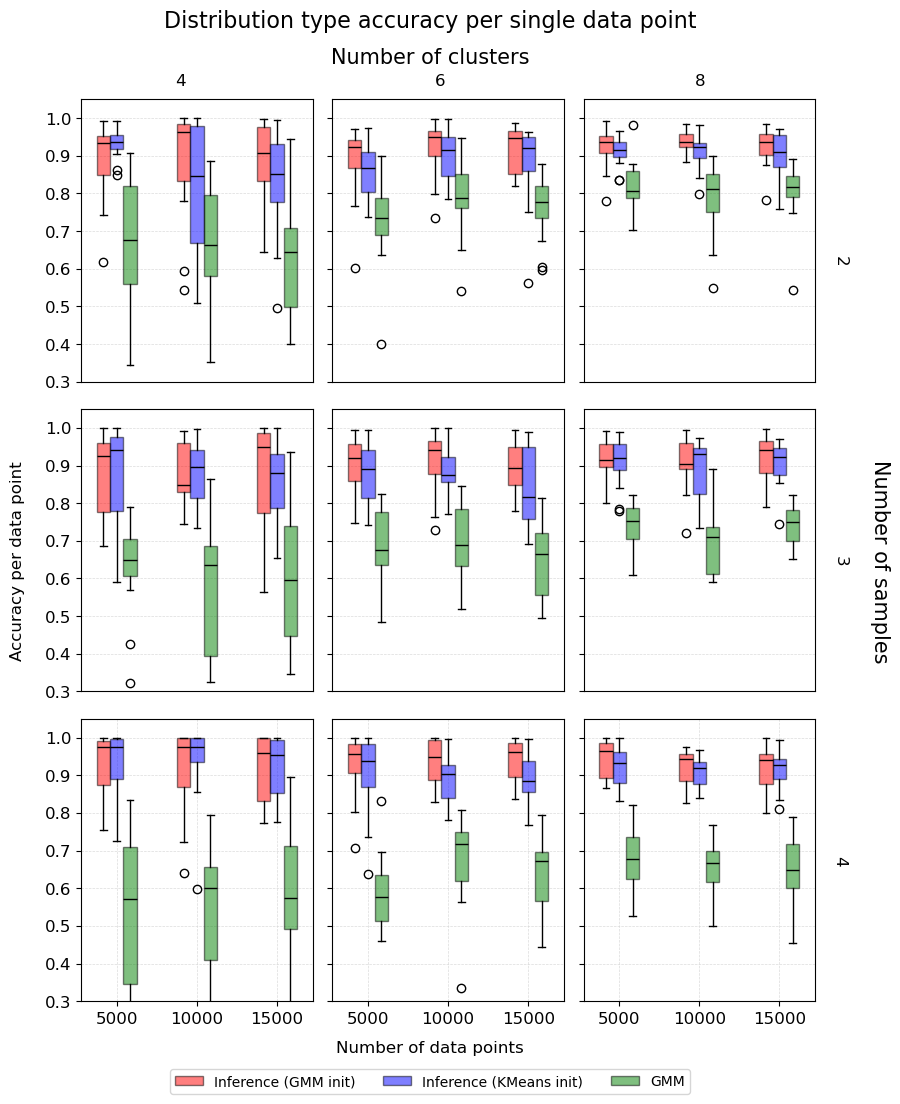

In [40]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]
        # Add a light gray grid to all subplots
        
        

        all_metrics_gmm = []
        all_metrics_kmeans = []
        all_metrics_gmm_init = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(acc_data_points_gmm.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm.append(metrics_gmm)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_kmeans = np.array(acc_data_points_kmeans.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_kmeans.append(metrics_kmeans)

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm_init = np.array(acc_data_points_gmm_init.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm_init.append(metrics_gmm_init)

        if any(metrics.size > 0 for metrics in all_metrics_gmm + all_metrics_kmeans):
            # Adjusted positions for six boxplots
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_gmm = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_kmeans = base_positions  # KMeans boxplots centered
            n_positions_gmm_init = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for GMM
            box_gmm = ax.boxplot(
                all_metrics_gmm, 
                positions=n_positions_gmm, 
                # notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for KMeans
            box_kmeans = ax.boxplot(
                all_metrics_kmeans, 
                positions=n_positions_kmeans, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_kmeans['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_kmeans['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for GMM init
            box_gmm_init = ax.boxplot(
                all_metrics_gmm_init, 
                positions=n_positions_gmm_init, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm_init['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm_init['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # # Add scatter points for individual data points (GMM)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_gmm, n_positions_gmm)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # # Add scatter points for individual data points (KMeans)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_kmeans, n_positions_kmeans)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                x_tick_positions = (n_positions_gmm + n_positions_kmeans + n_positions_gmm_init) / 3
                ax.set_xticks(x_tick_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])
            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per single data point', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per data point', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Inference (GMM init)'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Inference (KMeans init)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='GMM')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.3, 1.05])
plt.show()


# Plots with final values


#### Accuracy per cluster

In [4]:
def compute_pairwise_nmi(true_labels, predicted_labels, threshold=0.5):
    unique_true = np.unique(np.array(true_labels, dtype = 'int'))
    unique_pred = np.unique(predicted_labels)
    # Initialize mapping and NMI matrix
    nmi_matrix = np.zeros((len(unique_true), len(unique_pred)))
    label_mapping = {}
    
    # Construct pairwise NMI matrix
    # Rows: true labels, Columns: predicted labels
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            true_mask = (true_labels == true_label).astype(int)
            pred_mask = (predicted_labels == pred_label).astype(int)
            nmi_matrix[i, j] = normalized_mutual_info_score(true_mask, pred_mask)
    
    # Select the best matching predicted label for each true label
    for i, true_label in enumerate(unique_true):
        best_pred_index = np.argmax(nmi_matrix[i, :])  # Index of the best match (i.e. column)
        best_nmi = nmi_matrix[i, best_pred_index]

        if best_nmi >= threshold:
            label_mapping[true_label] = unique_pred[best_pred_index]

    return label_mapping, nmi_matrix  

GMM final inference

In [5]:
# 3*9*15 = 405 files
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

accuracy_gmm = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
accuracy_beta = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
accuracy_pareto = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
accuracy_dirac = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}

mae_phi = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
mae_kappa = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
mae_alpha = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}

true_phi_dic = []
true_kappa_dic = []
true_alpha_dic = []
pred_phi_dic = []
pred_kappa_dic = []
pred_alpha_dic = []

acc_data_points_gmm = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
accuracy_data_points_beta = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
accuracy_data_points_pareto = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}
accuracy_data_points_dirac = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}

idx = 0
for dim in D_values:
    directory = general_folder_gmm + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            if df < 15:
                print('idx: ', idx, 'N ', N, 'K ', K, 'D ', D, 'idx ',df)
                idx+=1
                file_path = os.path.join(directory, filename)
                df_data = pd.read_csv(file_path)
                if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                    true_labels = df_data['True_cluster'].tolist()
                    pred_labels = df_data['Pred_cluster'].tolist()

                    nmi_threshold = 0.4 # 0.5
                    label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                    true_labels_match = list(label_mapping.keys())
                    pred_labels_match = list(label_mapping.values())

                    # Extract true and predicted distributions from the csv
                    true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                    true_dist = torch.tensor(true_dist, dtype=torch.int)
                    pred_dist = df_data['Pred_distribution'].apply(ast.literal_eval)
                    pred_dist = torch.tensor(pred_dist, dtype=torch.int)
                    """
                    COMPUTE VALUES WITH MATCHED CLUSTERS
                    """
                    first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                    true_dist_match = true_dist[first_occurrence_indices_true].ravel()
                    
                    first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                    pred_dist_match = pred_dist[first_occurrence_indices_pred].ravel()
                    
                    true_phi = torch.tensor(df_data['True_phi'].apply(ast.literal_eval), dtype=torch.float)
                    pred_phi = torch.tensor(df_data['Pred_phi'].apply(ast.literal_eval), dtype=torch.float)
                    true_phi = true_phi[first_occurrence_indices_true].ravel()
                    pred_phi = pred_phi[first_occurrence_indices_pred].ravel()
                    true_alpha = torch.tensor(df_data['True_alpha'].apply(ast.literal_eval), dtype=torch.float)
                    pred_alpha = torch.tensor(df_data['Pred_alpha'].apply(ast.literal_eval), dtype=torch.float)
                    true_alpha = true_alpha[first_occurrence_indices_true].ravel()
                    pred_alpha = pred_alpha[first_occurrence_indices_pred].ravel()
                    true_kappa = torch.tensor(df_data['True_kappa'].apply(ast.literal_eval), dtype=torch.float)
                    pred_kappa = torch.tensor(df_data['Pred_kappa'].apply(ast.literal_eval), dtype=torch.float)
                    true_kappa = true_kappa[first_occurrence_indices_true].ravel()
                    pred_kappa = pred_kappa[first_occurrence_indices_pred].ravel()
                    diff_phi = []
                    diff_alpha = []
                    diff_kappa = []
                    for p in range(len(pred_dist_match)):
                        if pred_dist_match[p] == 1 and true_dist_match[p] == 1: # beta
                            diff_phi.append(np.abs(true_phi[p].item() - pred_phi[p].item()))
                            diff_kappa.append(np.abs(true_kappa[p].item() - pred_kappa[p].item()))
                            true_phi_dic.append(true_phi[p].item())
                            true_kappa_dic.append(true_kappa[p].item())
                            pred_phi_dic.append(pred_phi[p].item())
                            pred_kappa_dic.append(pred_kappa[p].item())
                        if pred_dist_match[p] == 0 and true_dist_match[p] == 0: # pareto
                            diff_alpha.append(np.abs(true_alpha[p].item() - pred_alpha[p].item()))
                            true_alpha_dic.append(true_alpha[p].item())
                            pred_alpha_dic.append(pred_alpha[p].item())
                    
                    if len(diff_phi) > 0:
                        mae_phi[f"N_{N}_K_{K}_D_{D}"].append(np.mean(diff_phi))
                    if len(diff_kappa) > 0:
                        mae_kappa[f"N_{N}_K_{K}_D_{D}"].append(np.mean(diff_kappa))
                    if len(diff_alpha) > 0:
                        mae_alpha[f"N_{N}_K_{K}_D_{D}"].append(np.mean(diff_alpha))
                    
                    # Flatten the arrays
                    # 1: beta, 0: Pareto, 2: Dirac
                    accuracy = accuracy_score(true_dist_match, pred_dist_match)
                    accuracy_gmm[f"N_{N}_K_{K}_D_{D}"].append(accuracy)
                    
                    idx_beta = np.where(true_dist_match == 1)[0]
                    if len(idx_beta) > 0:
                        acc_beta = accuracy_score(true_dist_match[idx_beta], pred_dist_match[idx_beta])
                        accuracy_beta[f"N_{N}_K_{K}_D_{D}"].append(acc_beta)
                    
                    idx_pareto = np.where(true_dist_match == 0)[0]
                    if len(idx_pareto) > 0:
                        acc_pareto = accuracy_score(true_dist_match[idx_pareto], pred_dist_match[idx_pareto])
                        accuracy_pareto[f"N_{N}_K_{K}_D_{D}"].append(acc_pareto)
                    
                    idx_dirac = np.where(true_dist_match == 2)[0]
                    if len(idx_dirac) > 0:
                        acc_dirac = accuracy_score(true_dist_match[idx_dirac], pred_dist_match[idx_dirac])
                        accuracy_dirac[f"N_{N}_K_{K}_D_{D}"].append(acc_dirac)
                    """
                    COMPUTE VALUES PER SINGLE MUTATION
                    """
                    true_dist = true_dist.ravel()
                    pred_dist = pred_dist.ravel()
                    
                    accuracy_data_points = accuracy_score(true_dist, pred_dist)
                    # accuracy_data_points = np.mean(true_dist[:, 0] == pred_dist[:, 0])
                    acc_data_points_gmm[f"N_{N}_K_{K}_D_{D}"].append(accuracy_data_points)

                    idx_beta = np.where(true_dist == 1)[0]
                    if len(idx_beta) > 0:
                        acc_data_points_beta = accuracy_score(true_dist[idx_beta], pred_dist[idx_beta])
                        accuracy_data_points_beta[f"N_{N}_K_{K}_D_{D}"].append(acc_data_points_beta)
                    
                    idx_pareto = np.where(true_dist == 0)[0]
                    if len(idx_pareto) > 0:
                        acc_data_points_pareto = accuracy_score(true_dist[idx_pareto], pred_dist[idx_pareto])
                        accuracy_data_points_pareto[f"N_{N}_K_{K}_D_{D}"].append(acc_data_points_pareto)
                    
                    idx_dirac = np.where(true_dist == 2)[0]
                    if len(idx_dirac) > 0:
                        acc_data_points_dirac = accuracy_score(true_dist[idx_dirac], pred_dist[idx_dirac])
                        accuracy_data_points_dirac[f"N_{N}_K_{K}_D_{D}"].append(acc_data_points_dirac)
# metrics_data

idx:  0 N  10000 K  6 D  2 idx  2
idx:  1 N  15000 K  8 D  2 idx  0
idx:  2 N  15000 K  4 D  2 idx  4
idx:  3 N  15000 K  4 D  2 idx  7
idx:  4 N  10000 K  4 D  2 idx  4
idx:  5 N  10000 K  8 D  2 idx  13
idx:  6 N  5000 K  6 D  2 idx  0
idx:  7 N  10000 K  4 D  2 idx  5
idx:  8 N  15000 K  4 D  2 idx  11
idx:  9 N  15000 K  4 D  2 idx  2
idx:  10 N  5000 K  8 D  2 idx  4
idx:  11 N  10000 K  8 D  2 idx  8
idx:  12 N  15000 K  4 D  2 idx  14
idx:  13 N  10000 K  8 D  2 idx  5
idx:  14 N  15000 K  8 D  2 idx  14
idx:  15 N  5000 K  8 D  2 idx  13
idx:  16 N  10000 K  6 D  2 idx  11
idx:  17 N  10000 K  6 D  2 idx  9
idx:  18 N  5000 K  4 D  2 idx  5
idx:  19 N  5000 K  4 D  2 idx  3
idx:  20 N  15000 K  6 D  2 idx  7
idx:  21 N  10000 K  8 D  2 idx  6
idx:  22 N  15000 K  8 D  2 idx  12
idx:  23 N  10000 K  4 D  2 idx  11
idx:  24 N  10000 K  6 D  2 idx  5
idx:  25 N  5000 K  8 D  2 idx  9
idx:  26 N  15000 K  6 D  2 idx  9
idx:  27 N  10000 K  6 D  2 idx  4
idx:  28 N  5000 K  8 D  2 i

In [48]:
import pickle

variable_names = [
    "accuracy_data_points_beta", "accuracy_data_points_pareto", "accuracy_data_points_dirac", "acc_data_points_gmm",
    "accuracy_beta", "accuracy_pareto", "accuracy_dirac", "accuracy_gmm",
    "mae_phi", "mae_kappa", "mae_alpha",
    "true_phi_dic", "true_kappa_dic", "true_alpha_dic", "pred_phi_dic", "pred_kappa_dic", "pred_alpha_dic"
]

folder_path = general_folder_gmm + 'finals/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save each variable in a separate file
for name in variable_names:
    with open(general_folder_gmm + f"finals/{name}.pkl", "wb") as f:
        pickle.dump(globals()[name], f)

# Load back (for testing)
loaded_data = {}
for name in variable_names:
    with open(general_folder_gmm + f"finals/{name}.pkl", "rb") as f:
        globals()[name] = pickle.load(f)

# Print loaded variables to verify
print("Loaded variables:", [name for name in variable_names if name in globals()])


Loaded variables: ['accuracy_data_points_beta', 'accuracy_data_points_pareto', 'accuracy_data_points_dirac', 'acc_data_points_gmm', 'accuracy_beta', 'accuracy_pareto', 'accuracy_dirac', 'accuracy_gmm', 'mae_phi', 'mae_kappa', 'mae_alpha', 'true_phi_dic', 'true_kappa_dic', 'true_alpha_dic', 'pred_phi_dic', 'pred_kappa_dic', 'pred_alpha_dic']


MAE parameters

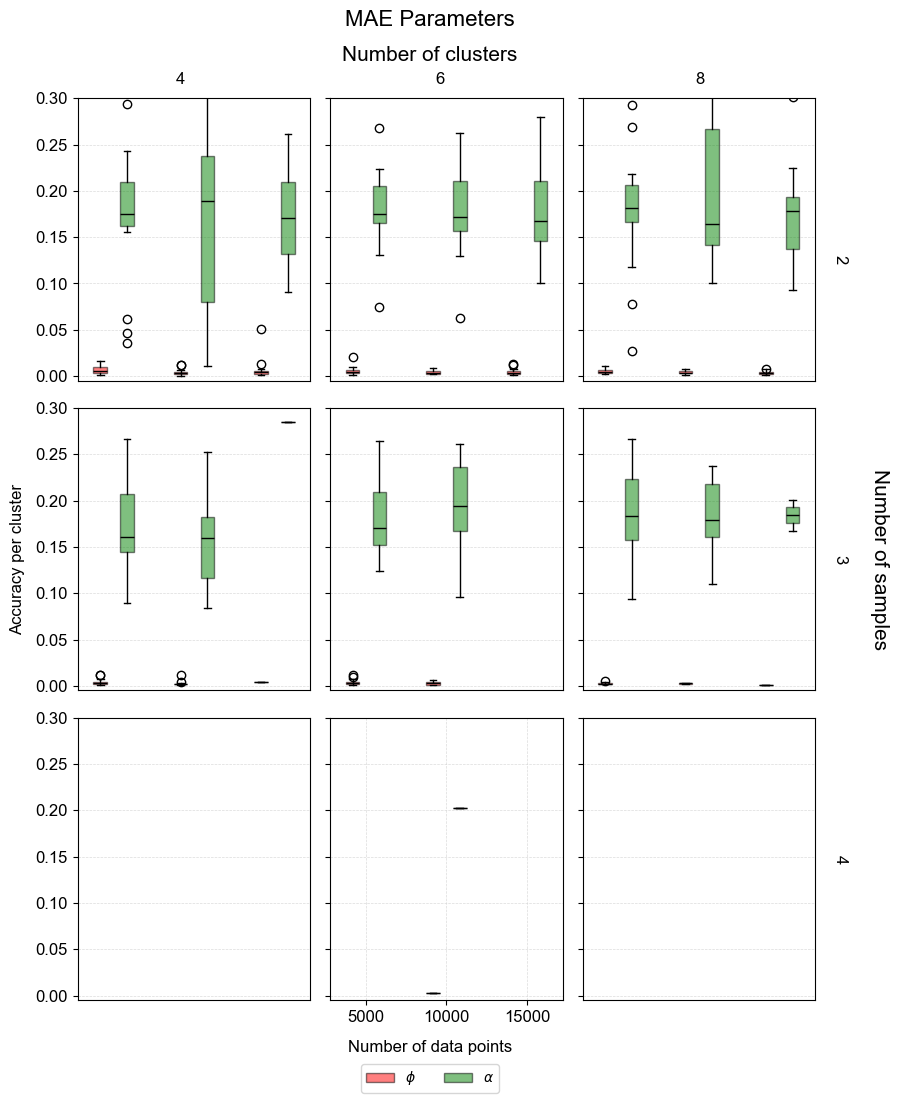

In [6]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_phi = []
        all_metrics_kappa = []
        all_metrics_alpha = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_phi = np.array(mae_phi.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_phi.append(metrics_phi)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_kappa = np.array(mae_kappa.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_kappa.append(metrics_kappa)
        # print(all_metrics_kappa)
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_alpha = np.array(mae_alpha.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_alpha.append(metrics_alpha)

        if any(metrics.size > 0 for metrics in all_metrics_phi + all_metrics_kappa):
            # Adjusted positions for six boxplots
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_phi = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_kappa = base_positions  # KMeans boxplots centered
            n_positions_alpha = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for beta
            box_phi = ax.boxplot(
                all_metrics_phi, 
                positions=n_positions_phi, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_phi['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_phi['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for pareto
            box_kappa = ax.boxplot(
                all_metrics_kappa, 
                positions=n_positions_kappa, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_kappa['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_kappa['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for dirac
            box_alpha = ax.boxplot(
                all_metrics_alpha, 
                positions=n_positions_alpha, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_alpha['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_alpha['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                x_tick_positions = (n_positions_phi + n_positions_kappa + n_positions_alpha) / 3
                ax.set_xticks(x_tick_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'MAE Parameters', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per cluster', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label=r'$\phi$'),
    # Patch(facecolor='blue', edgecolor='black', alpha=0.5, label=r'$\kappa$'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label=r'$\alpha$')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([-0.005, 0.3])
plt.show()

MAE parameters violins

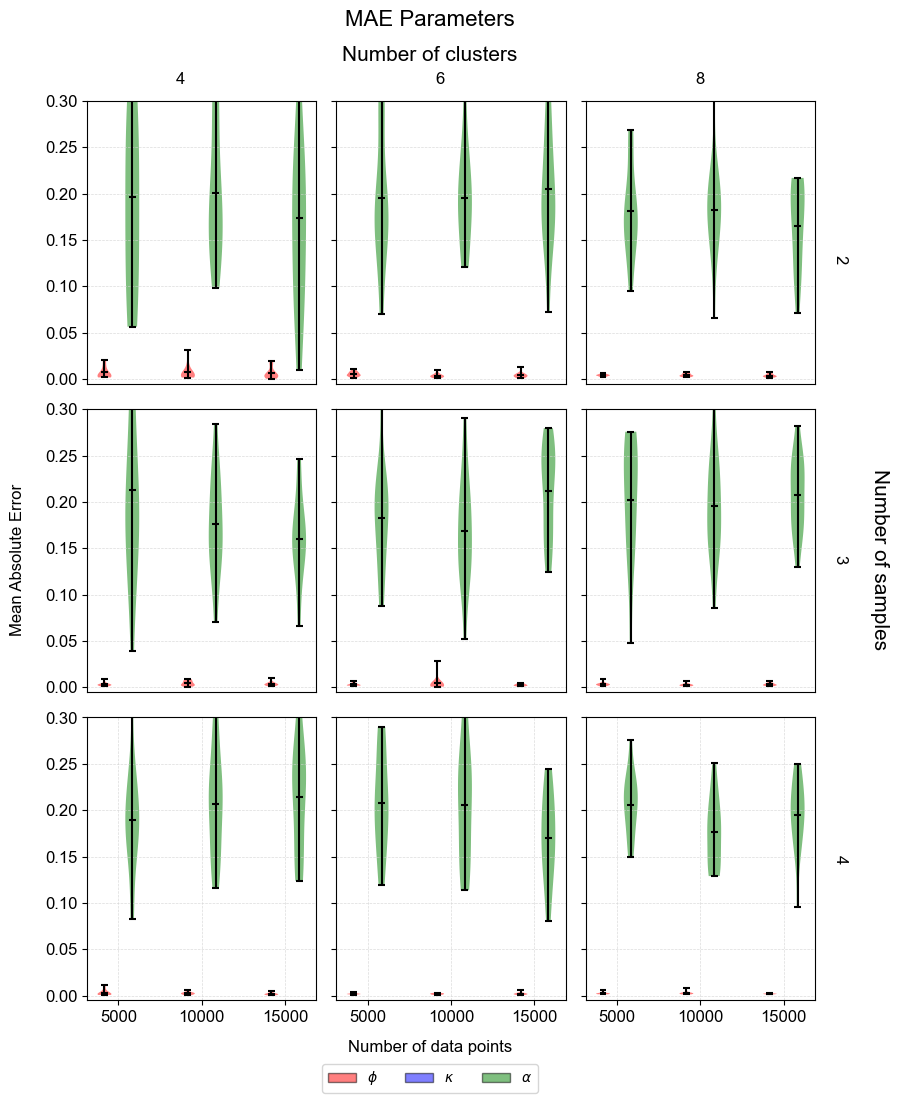

In [70]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_phi = []
        all_metrics_kappa = []
        all_metrics_alpha = []

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            all_metrics_phi.append(np.array(mae_phi.get(metrics_key, [])))
            all_metrics_kappa.append(np.array(mae_kappa.get(metrics_key, [])))
            all_metrics_alpha.append(np.array(mae_alpha.get(metrics_key, [])))

        if any(metrics.size > 0 for metrics in all_metrics_phi + all_metrics_kappa + all_metrics_alpha):
            # Define positions for violin plots
            scale_factor = 1.8  
            base_positions = np.arange(len(N_values)) * scale_factor  

            n_positions_phi = base_positions - 0.3  
            n_positions_kappa = base_positions  
            n_positions_alpha = base_positions + 0.3  

            # Create violin plots
            parts_phi = ax.violinplot(all_metrics_phi, positions=n_positions_phi, showmeans=True, widths=0.3)
            parts_kappa = ax.violinplot(all_metrics_kappa, positions=n_positions_kappa, showmeans=True, widths=0.3)
            parts_alpha = ax.violinplot(all_metrics_alpha, positions=n_positions_alpha, showmeans=True, widths=0.3)

            # Color violins
            for part in parts_phi['bodies']:
                part.set_facecolor('red')
                part.set_alpha(0.5)
            for part in parts_kappa['bodies']:
                part.set_facecolor('blue')
                part.set_alpha(0.5)
            for part in parts_alpha['bodies']:
                part.set_facecolor('green')
                part.set_alpha(0.5)

            # Change line colors to black
            for parts in [parts_phi, parts_kappa, parts_alpha]:
                for key in ['cmeans', 'cbars', 'cmins', 'cmaxes']:
                    if key in parts:
                        part = parts[key]
                        if isinstance(part, list):
                            for p in part:
                                p.set_color('black')
                                p.set_linewidth(1.5)
                        else:
                            part.set_color('black')
                            part.set_linewidth(1.5)

            # Set x-ticks
            if i == len(D_values) - 1:
                ax.set_xticks(base_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([-0.005, 0.3])  
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'MAE Parameters', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Mean Absolute Error', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label=r'$\phi$'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label=r'$\kappa$'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label=r'$\alpha$')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  
    bbox_to_anchor=(0.5, 0.05),  
    ncol=3,  
    fontsize=10  
)

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.show()

Scatter parameters

/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_61532/338017628.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


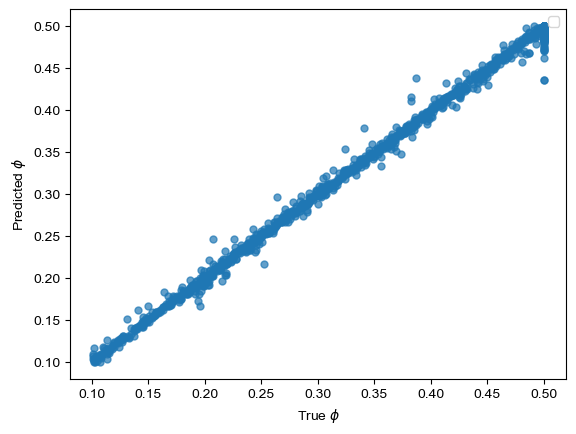

In [7]:
# true_phi = [item for sublist in true_phi_dic.values() for item in sublist]
# pred_phi = [item for sublist in pred_phi_dic.values() for item in sublist]

plt.scatter(true_phi_dic, pred_phi_dic, alpha = 0.7, s = 25)
# slope, intercept = np.polyfit(true_phi_list, pred_phi_list, 1)

# regression_line = [slope * x + intercept for x in true_phi_list]

# plt.plot(true_phi_list, regression_line, color='red', linewidth = 1,label=f'y={slope:.2f}x+{intercept:.2f}')

plt.xlabel(f'True $\\phi$')
plt.ylabel('Predicted $\\phi$')
plt.legend()
# plt.xlim([0.8, 1.6])
# plt.ylim([0.8, 1.6])
plt.show()

/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_61532/3532966316.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


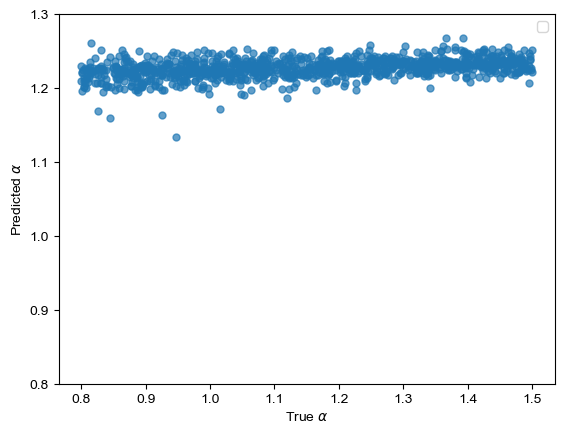

In [8]:
# true_alpha = [item for sublist in true_alpha_dic.values() for item in sublist]
# pred_alpha = [item for sublist in pred_alpha_dic.values() for item in sublist]

plt.scatter(true_alpha_dic, pred_alpha_dic, alpha = 0.7, s = 25)
# slope, intercept = np.polyfit(true_phi_list, pred_phi_list, 1)

# regression_line = [slope * x + intercept for x in true_phi_list]

# plt.plot(true_phi_list, regression_line, color='red', linewidth = 1,label=f'y={slope:.2f}x+{intercept:.2f}')

plt.xlabel(f'True $\\alpha$')
plt.ylabel('Predicted $\\alpha$')
plt.legend()
# plt.xlim([0.8, 1.6])
plt.ylim([0.8, 1.3])
plt.show()

Distribution type accuracy per matched clusters, separated by diistribution type (violins)

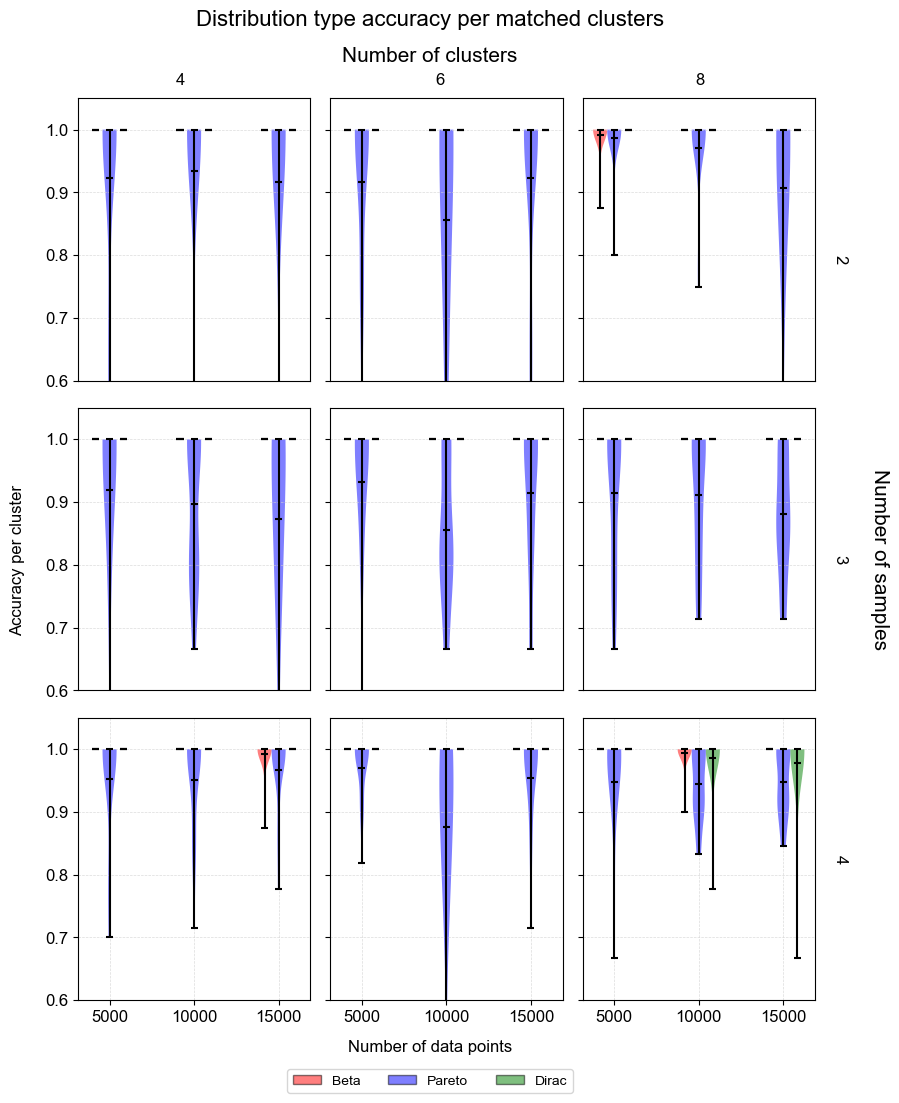

In [71]:
fig, axes = plt.subplots(len(D_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_beta = []
        all_metrics_pareto = []
        all_metrics_dirac = []
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            all_metrics_beta.append(np.array(accuracy_beta.get(metrics_key, [])))
            all_metrics_pareto.append(np.array(accuracy_pareto.get(metrics_key, [])))
            all_metrics_dirac.append(np.array(accuracy_dirac.get(metrics_key, [])))

        if any(metrics.size > 0 for metrics in all_metrics_beta + all_metrics_pareto + all_metrics_dirac):
            # Define positions for violin plots
            scale_factor = 1.8  
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_beta = base_positions - 0.3  
            n_positions_pareto = base_positions  
            n_positions_dirac = base_positions + 0.3  

            # Create violin plots
            parts_beta = ax.violinplot(
                all_metrics_beta, positions=n_positions_beta, showmeans=True, widths=0.3
            )
            parts_pareto = ax.violinplot(
                all_metrics_pareto, positions=n_positions_pareto, showmeans=True, widths=0.3
            )
            parts_dirac = ax.violinplot(
                all_metrics_dirac, positions=n_positions_dirac, showmeans=True, widths=0.3
            )

            # Color violins
            for part in parts_beta['bodies']:
                part.set_facecolor('red')
                part.set_alpha(0.5)
            for part in parts_pareto['bodies']:
                part.set_facecolor('blue')
                part.set_alpha(0.5)
            for part in parts_dirac['bodies']:
                part.set_facecolor('green')
                part.set_alpha(0.5)

            # Change **both horizontal (mean) and vertical (whiskers) lines to black** (with key checking)
            for parts in [parts_beta, parts_pareto, parts_dirac]:
                for key in ['cmeans', 'cbars', 'cmins', 'cmaxes']:
                    if key in parts:
                        part = parts[key]
                        if isinstance(part, list):  # Sometimes, it's a list of line objects
                            for p in part:
                                p.set_color('black')
                                p.set_linewidth(1.5)
                        else:  # If it's a single object
                            part.set_color('black')
                            part.set_linewidth(1.5)

            # Set x-ticks
            if i == len(D_values) - 1:
                ax.set_xticks(base_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01]) 
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per matched clusters', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per cluster', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Beta'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Pareto'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Dirac')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.6, 1.05])
plt.show()

Distribution type accuracy per matched clusters (boxplots)

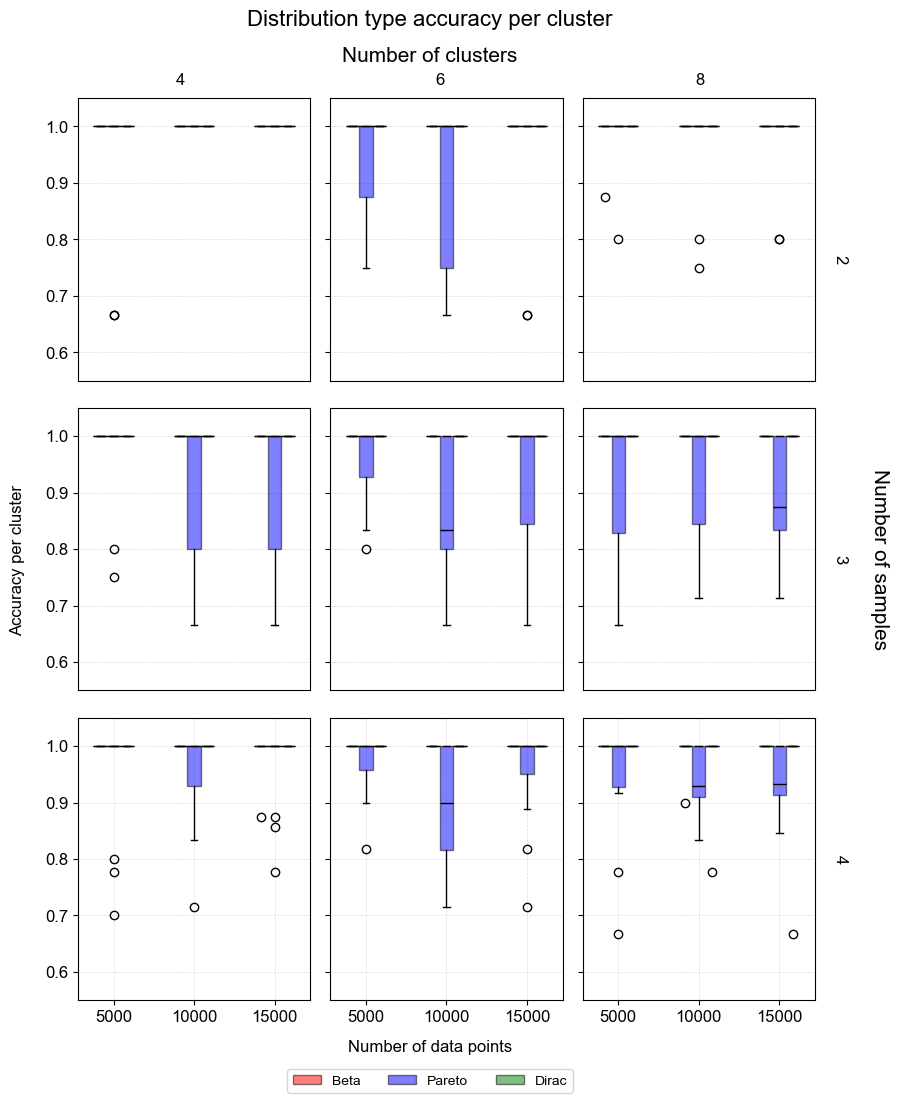

In [72]:
distr_values = ['Beta', 'Pareto', 'Dirac']
fig, axes = plt.subplots(len(distr_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_beta = []
        all_metrics_pareto = []
        all_metrics_dirac = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_beta = np.array(accuracy_beta.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_beta.append(metrics_beta)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_pareto = np.array(accuracy_pareto.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_pareto.append(metrics_pareto)

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_dirac = np.array(accuracy_dirac.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_dirac.append(metrics_dirac)

        if any(metrics.size > 0 for metrics in all_metrics_beta + all_metrics_pareto):
            # Adjusted positions for six boxplots
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(distr_values)) * scale_factor  # Space out base positions

            n_positions_beta = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_pareto = base_positions  # KMeans boxplots centered
            n_positions_dirac = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for beta
            box_beta = ax.boxplot(
                all_metrics_beta, 
                positions=n_positions_beta, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_beta['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_beta['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for pareto
            box_pareto = ax.boxplot(
                all_metrics_pareto, 
                positions=n_positions_pareto, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_pareto['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_pareto['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for dirac
            box_dirac = ax.boxplot(
                all_metrics_dirac, 
                positions=n_positions_dirac, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_dirac['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_dirac['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                x_tick_positions = (n_positions_beta + n_positions_pareto + n_positions_dirac) / 3
                ax.set_xticks(x_tick_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per cluster', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per cluster', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Beta'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Pareto'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Dirac')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.55, 1.05])
plt.show()

Distribution type accuracy per matched clusters (all distributions together)

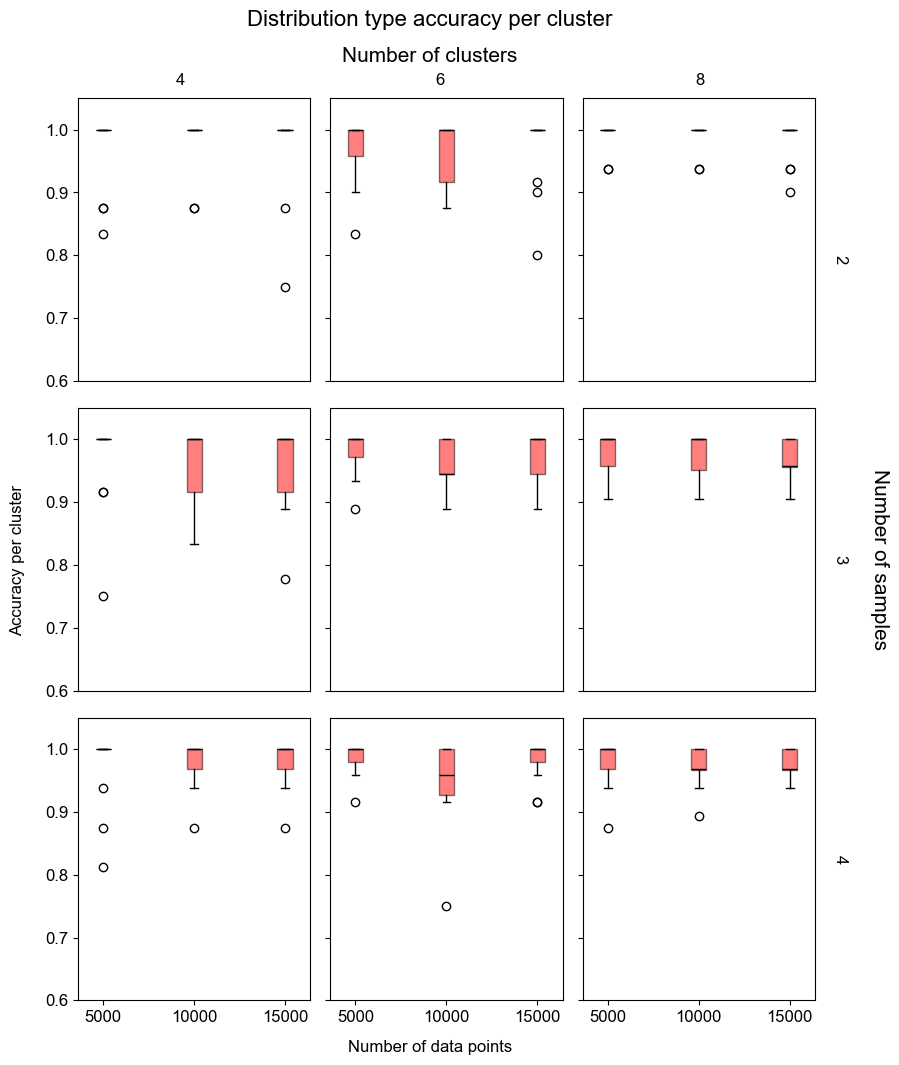

In [73]:
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_gmm = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(accuracy_gmm.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_gmm.append(metrics_gmm)
        
        if any(metrics.size > 0 for metrics in all_metrics_gmm):
            # Adjusted positions for six boxplots
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_gmm = base_positions - 0.3  # GMM boxplots slightly left of center
            # n_positions_kmeans = base_positions  # KMeans boxplots centered
            # n_positions_gmm_init = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for GMM
            box_gmm = ax.boxplot(
                all_metrics_gmm, 
                positions=n_positions_gmm, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_gmm['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Add scatter points for individual data points (GMM)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_gmm, n_positions_gmm)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=10)

            # # Add scatter points for individual data points (KMeans)
            # for k, (metrics, pos) in enumerate(zip(all_metrics_kmeans, n_positions_kmeans)):
            #     jitter = np.random.normal(0, 0.05, size=len(metrics))
            #     ax.scatter(pos + jitter, metrics, alpha=0.7, color='black', s=20)

            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                # ax.set_xticks((n_positions_gmm + n_positions_kmeans + n_positions_gmm_init) / 3)
                ax.set_xticks((n_positions_gmm))
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per cluster', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per cluster', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.6, 1.05])
plt.show()


Distribution type accuracy per matched clusters, one line

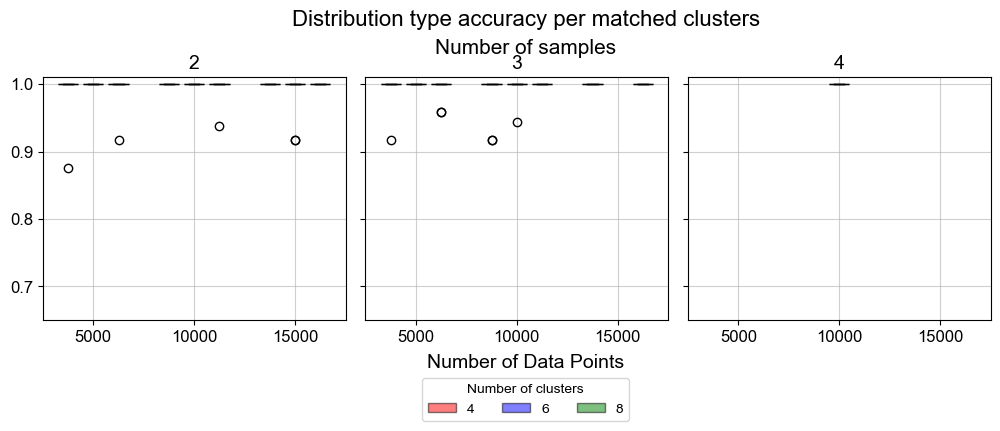

In [9]:
colors = ['red', 'blue', 'green']  # Colors for clusters

# Initialize figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(D_values), figsize=(12, 4), sharey=True)
base_pos_eps = 2
for i, D in enumerate(D_values):
    ax = axes[i]
    ax.grid(True, linestyle="-", alpha=0.6)  # Dashed grid with slight transparency
for i, D in enumerate(D_values):
    ax = axes[i]
    
    all_positions = []
    all_boxplots = []
    
    for j, N in enumerate(N_values):
        base_position = j * base_pos_eps  # Ensures spacing between different N values
        
        for k, (K, color) in enumerate(zip(K_values, colors)):
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(accuracy_gmm.get(metrics_key, []))
            # print(accuracy_gmm)
            pos = base_position + (k - 1) * 0.5  # Position within the section
            all_positions.append(pos)
            
            box_gmm = ax.boxplot(
                metrics_gmm, positions=[pos], notch=False, patch_artist=True, widths=0.4
            )
            
            for patch in box_gmm['boxes']:
                patch.set_facecolor(color)
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
                
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)
                
            all_boxplots.append(box_gmm)

    # Set x-ticks to indicate number of data points
    group_centers = [j * base_pos_eps for j in range(len(N_values))]  # Matches `base_position`

    ax.set_xticks(group_centers)  # Set computed centers as tick positions
    ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
        
    ax.set_title(f"{D}", fontsize=14)
    ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
    ax.tick_params(axis='y', labelsize=12)

# Add overall labels
fig.text(0.5, 0.95, 'Distribution type accuracy per matched clusters', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.08, 'Number of Data Points', ha='center', fontsize=14)
fig.text(0.5, 0.88, 'Number of samples', va='center', ha='center', fontsize=15)

# fig.text(0.08, 0.5, 'Accuracy per Cluster', va='center', rotation='vertical', fontsize=14)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='4'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='6'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='8')
]

fig.legend(
    handles=legend_elements,
    title="Number of clusters",  # Add a title
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.07),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
plt.ylim([0.65, 1.01])
plt.tight_layout(rect=[0.05, 0.1, 0.9, 0.9])
plt.show()

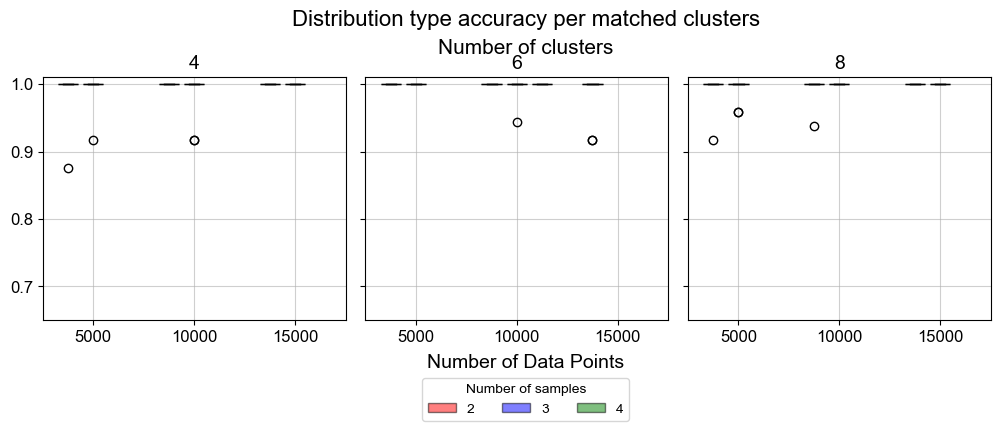

In [10]:
colors = ['red', 'blue', 'green']  # Colors for clusters

# Initialize figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(K_values), figsize=(12, 4), sharey=True)
base_pos_eps = 2
for i, K in enumerate(K_values):
    ax = axes[i]
    ax.grid(True, linestyle="-", alpha=0.6)  # Dashed grid with slight transparency
for i, K in enumerate(K_values):
    ax = axes[i]
    
    all_positions = []
    all_boxplots = []
    
    for j, N in enumerate(N_values):
        base_position = j * base_pos_eps  # Ensures spacing between different N values
        
        for d, (D, color) in enumerate(zip(D_values, colors)):
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(accuracy_gmm.get(metrics_key, []))
            # print(accuracy_gmm)
            pos = base_position + (d - 1) * 0.5  # Position within the section
            all_positions.append(pos)
            
            box_gmm = ax.boxplot(
                metrics_gmm, positions=[pos], notch=False, patch_artist=True, widths=0.4
            )
            
            for patch in box_gmm['boxes']:
                patch.set_facecolor(color)
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
                
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)
                
            all_boxplots.append(box_gmm)

    # Set x-ticks to indicate number of data points
    group_centers = [j * base_pos_eps for j in range(len(N_values))]  # Matches `base_position`

    ax.set_xticks(group_centers)  # Set computed centers as tick positions
    ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
        
    ax.set_title(f"{K}", fontsize=14)
    ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
    ax.tick_params(axis='y', labelsize=12)

# Add overall labels
fig.text(0.5, 0.95, 'Distribution type accuracy per matched clusters', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.08, 'Number of Data Points', ha='center', fontsize=14)
fig.text(0.5, 0.88, 'Number of clusters', va='center', ha='center', fontsize=15)

# fig.text(0.08, 0.5, 'Accuracy per Cluster', va='center', rotation='vertical', fontsize=14)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='2'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='3'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='4')
]

fig.legend(
    handles=legend_elements,
    title="Number of samples",  # Add a title
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.07),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
plt.ylim([0.65, 1.01])
plt.tight_layout(rect=[0.05, 0.1, 0.9, 0.9])
plt.show()

#### Accuracy per data point

Distribution type accuracy per single mutations, separated by diistribution type (boxplos)

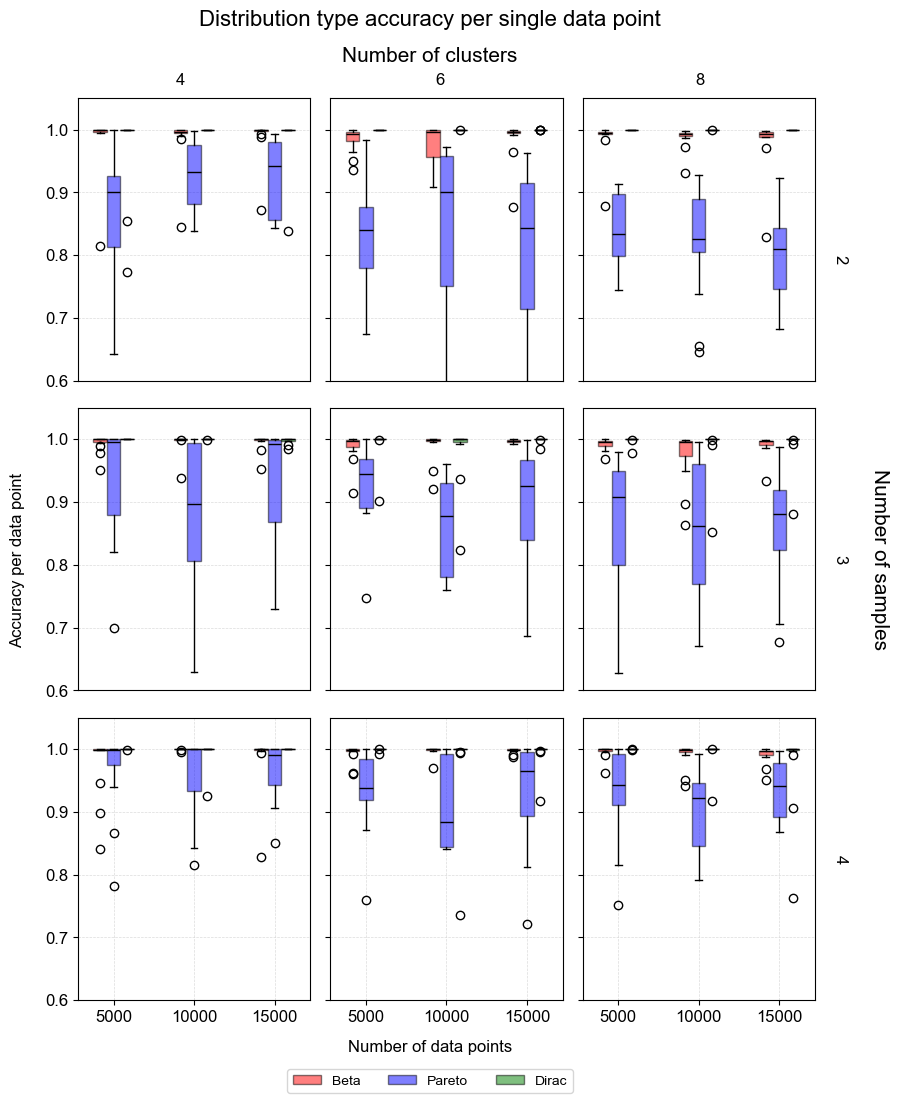

In [75]:
distr_values = ['Beta', 'Pareto', 'Dirac']
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]
        # Add a light gray grid to all subplots
        all_metrics_beta = []
        all_metrics_pareto = []
        all_metrics_dirac = []
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_beta = np.array(accuracy_data_points_beta.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_beta.append(metrics_beta)
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_pareto = np.array(accuracy_data_points_pareto.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_pareto.append(metrics_pareto)

        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_dirac = np.array(accuracy_data_points_dirac.get(metrics_key, []))  # Replace with your data retrieval logic
            all_metrics_dirac.append(metrics_dirac)

        if any(metrics.size > 0 for metrics in all_metrics_beta + all_metrics_pareto + all_metrics_dirac):
            # Adjusted positions for six boxplots
            scale_factor = 1.8  # Increase this to add more spacing between groups
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions
            n_positions_beta = base_positions - 0.3  # GMM boxplots slightly left of center
            n_positions_pareto = base_positions  # KMeans boxplots centered
            n_positions_dirac = base_positions + 0.3  # GMM init boxplots slightly right of center

            # Create boxplots for beta
            box_beta = ax.boxplot(
                all_metrics_beta, 
                positions=n_positions_beta, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_beta['boxes']:
                patch.set_facecolor('red')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_beta['medians']:
                median.set_color('black')
                median.set_linewidth(1)

            # Create boxplots for pareto
            box_pareto = ax.boxplot(
                all_metrics_pareto, 
                positions=n_positions_pareto, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_pareto['boxes']:
                patch.set_facecolor('blue')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_pareto['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # Create boxplots for dirac
            box_dirac = ax.boxplot(
                all_metrics_dirac, 
                positions=n_positions_dirac, 
                notch=False, 
                patch_artist=True, 
                widths=0.3
            )
            for patch in box_dirac['boxes']:
                patch.set_facecolor('green')
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
            for median in box_dirac['medians']:
                median.set_color('black')
                median.set_linewidth(1)
            
            # for patch in box_beta['boxes']:
            #     print("Beta color:", patch.get_facecolor())
            # for patch in box_pareto['boxes']:
            #     print("Pareto color:", patch.get_facecolor())
            # for patch in box_dirac['boxes']:
            #     print("Dirac color:", patch.get_facecolor())
            
            # Set x-ticks for N values
            if i == len(D_values) - 1:  # Only for the bottom row
                ax.set_xticks((n_positions_beta + n_positions_pareto + n_positions_dirac) / 3)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])
                
            ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per single data point', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per data point', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Beta'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Pareto'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Dirac')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.6, 1.05])
plt.show()


Distribution type accuracy per single mutations, separated by diistribution type (violins)

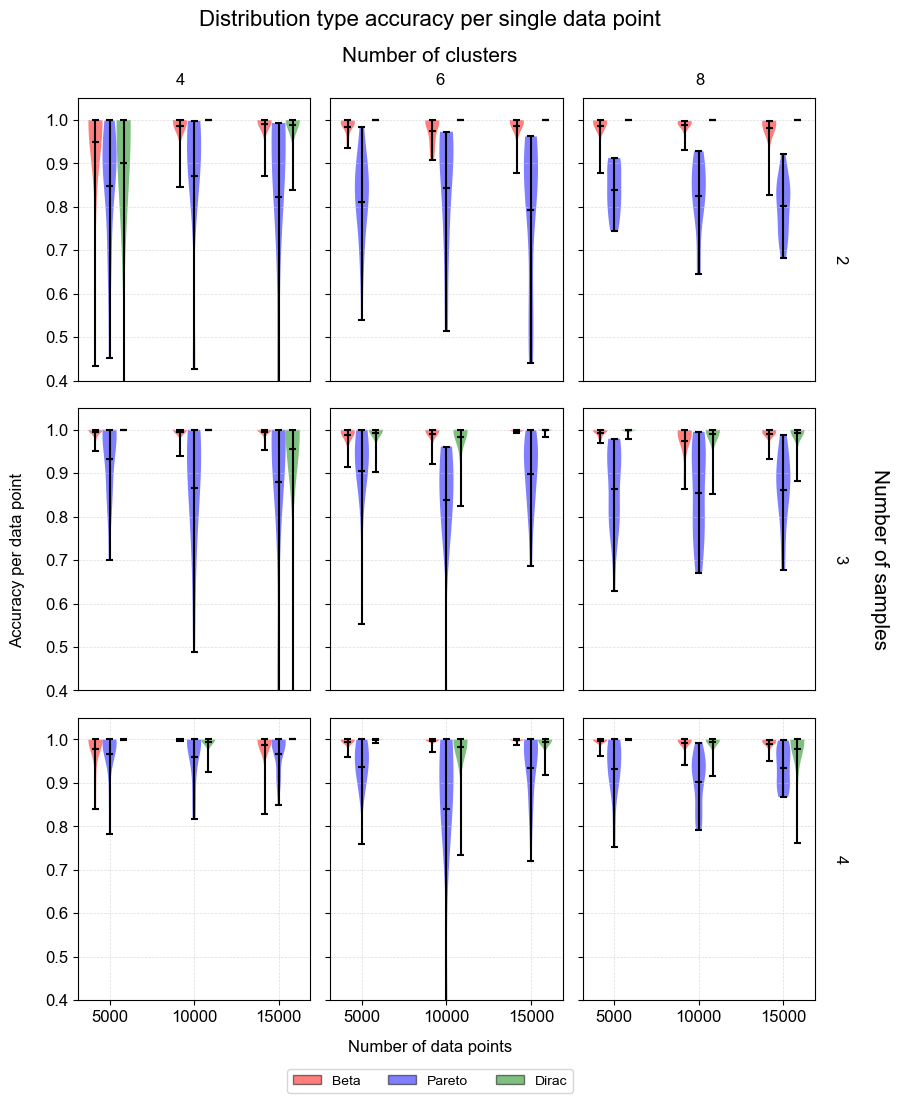

In [76]:
distr_values = ['Beta', 'Pareto', 'Dirac']
fig, axes = plt.subplots(len(D_values), len(K_values), figsize=(10, 12), sharey=True)

for ax_ in axes.flatten():
    ax_.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)

for i, D in enumerate(D_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]

        all_metrics_beta = []
        all_metrics_pareto = []
        all_metrics_dirac = []
        
        for N in N_values:
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            all_metrics_beta.append(np.array(accuracy_data_points_beta.get(metrics_key, [])))
            all_metrics_pareto.append(np.array(accuracy_data_points_pareto.get(metrics_key, [])))
            all_metrics_dirac.append(np.array(accuracy_data_points_dirac.get(metrics_key, [])))
        
        if any(metrics.size > 0 for metrics in all_metrics_beta + all_metrics_pareto + all_metrics_dirac):
            # Define positions for violin plots
            scale_factor = 1.8  
            base_positions = np.arange(len(N_values)) * scale_factor  # Space out base positions

            n_positions_beta = base_positions - 0.3  
            n_positions_pareto = base_positions  
            n_positions_dirac = base_positions + 0.3  

            # Create violin plots
            parts_beta = ax.violinplot(
                all_metrics_beta, positions=n_positions_beta, showmeans=True, widths=0.3
            )
            parts_pareto = ax.violinplot(
                all_metrics_pareto, positions=n_positions_pareto, showmeans=True, widths=0.3
            )
            parts_dirac = ax.violinplot(
                all_metrics_dirac, positions=n_positions_dirac, showmeans=True, widths=0.3
            )

            # Color violins
            for part in parts_beta['bodies']:
                part.set_facecolor('red')
                part.set_alpha(0.5)
            for part in parts_pareto['bodies']:
                part.set_facecolor('blue')
                part.set_alpha(0.5)
            for part in parts_dirac['bodies']:
                part.set_facecolor('green')
                part.set_alpha(0.5)

            # Change **both horizontal (mean) and vertical (whiskers) lines to black** (with key checking)
            for parts in [parts_beta, parts_pareto, parts_dirac]:
                for key in ['cmeans', 'cbars', 'cmins', 'cmaxes']:
                    if key in parts:
                        part = parts[key]
                        if isinstance(part, list):  # Sometimes, it's a list of line objects
                            for p in part:
                                p.set_color('black')
                                p.set_linewidth(1.5)
                        else:  # If it's a single object
                            part.set_color('black')
                            part.set_linewidth(1.5)

            # Set x-ticks
            if i == len(D_values) - 1:
                ax.set_xticks(base_positions)
                ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
            else:
                ax.set_xticks([])

            ax.set_ylim([0.0, 1.01]) 
            ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='y', labelsize=12)
for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=12)

fig.text(0.5, 0.95, 'Distribution type accuracy per single data point', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.92, 'Number of clusters', va='center', ha='center', fontsize=15)

fig.text(0.95, 0.5, 'Number of samples', va='center', ha='center', rotation=-90, fontsize=15)
for i, D in enumerate(D_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{D}', va='center', ha='center', rotation=-90, fontsize=12)

fig.text(0.08, 0.5, 'Accuracy per data point', va='center', rotation='vertical', fontsize=12)
fig.text(0.5, 0.09, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Beta'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Pareto'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Dirac')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, 0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

plt.ylim([0.4, 1.05])
plt.show()


Distribution type accuracy per single mutations, one line

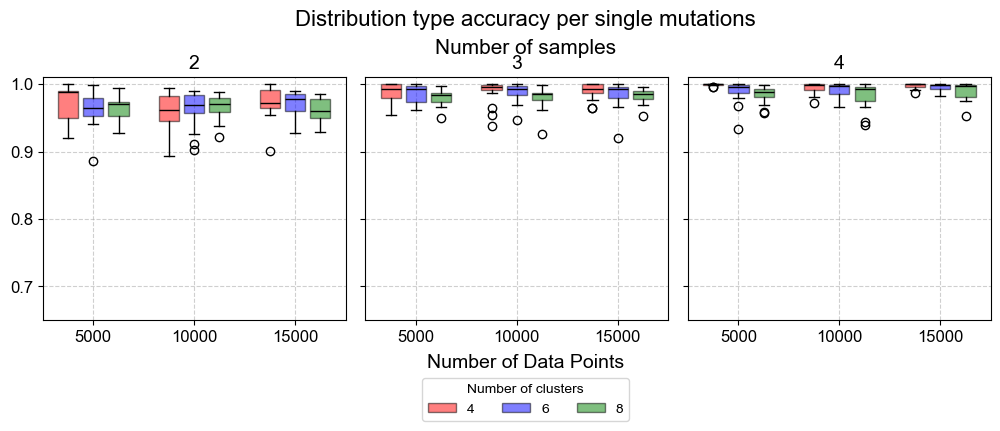

In [42]:
colors = ['red', 'blue', 'green']  # Colors for clusters

# Initialize figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(D_values), figsize=(12, 4), sharey=True)
base_pos_eps = 2
for i, D in enumerate(D_values):
    ax = axes[i]
    ax.grid(True, linestyle="--", alpha=0.6)  # Dashed grid with slight transparency
for i, D in enumerate(D_values):
    ax = axes[i]
    
    all_positions = []
    all_boxplots = []
    
    for j, N in enumerate(N_values):
        base_position = j * base_pos_eps  # Ensures spacing between different N values
        
        for k, (K, color) in enumerate(zip(K_values, colors)):
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(acc_data_points_gmm.get(metrics_key, []))
            # print(accuracy_gmm)
            pos = base_position + (k - 1) * 0.5  # Position within the section
            all_positions.append(pos)
            
            box_gmm = ax.boxplot(
                metrics_gmm, positions=[pos], notch=False, patch_artist=True, widths=0.4
            )
            
            for patch in box_gmm['boxes']:
                patch.set_facecolor(color)
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
                
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)
                
            all_boxplots.append(box_gmm)

    # Set x-ticks to indicate number of data points
    group_centers = [j * base_pos_eps for j in range(len(N_values))]  # Matches `base_position`

    ax.set_xticks(group_centers)  # Set computed centers as tick positions
    ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
        
    ax.set_title(f"{D}", fontsize=14)
    ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
    ax.tick_params(axis='y', labelsize=12)

# Add overall labels
fig.text(0.5, 0.95, 'Distribution type accuracy per single mutations', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.08, 'Number of Data Points', ha='center', fontsize=14)
fig.text(0.5, 0.88, 'Number of samples', va='center', ha='center', fontsize=15)

# fig.text(0.08, 0.5, 'Accuracy per Cluster', va='center', rotation='vertical', fontsize=14)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='4'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='6'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='8')
]

fig.legend(
    handles=legend_elements,
    title="Number of clusters",  # Add a title
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.07),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
plt.ylim([0.65, 1.01])
plt.tight_layout(rect=[0.05, 0.1, 0.9, 0.9])
plt.show()

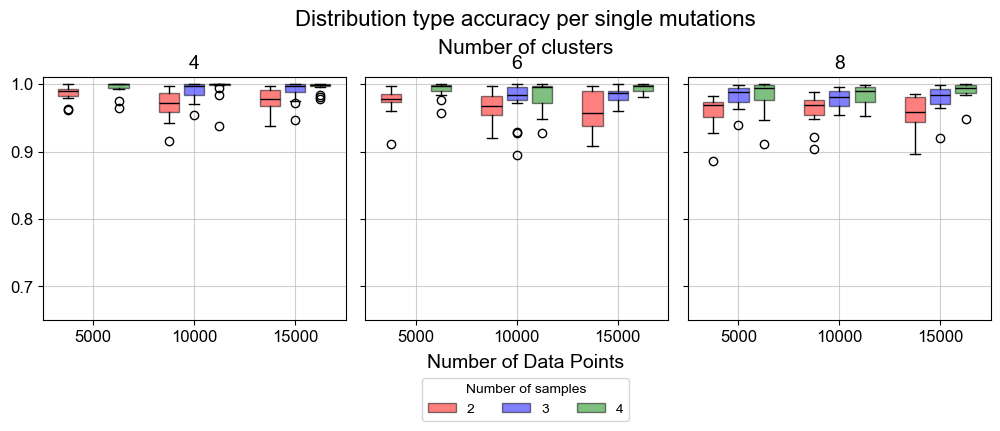

In [56]:
colors = ['red', 'blue', 'green']  # Colors for clusters

# Initialize figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(K_values), figsize=(12, 4), sharey=True)
base_pos_eps = 2
for i, K in enumerate(K_values):
    ax = axes[i]
    ax.grid(True, linestyle="-", alpha=0.6)  # Dashed grid with slight transparency
for i, K in enumerate(K_values):
    ax = axes[i]
    
    all_positions = []
    all_boxplots = []
    
    for j, N in enumerate(N_values):
        base_position = j * base_pos_eps  # Ensures spacing between different N values
        
        for d, (D, color) in enumerate(zip(D_values, colors)):
            metrics_key = f"N_{N}_K_{K}_D_{D}"
            metrics_gmm = np.array(acc_data_points_gmm.get(metrics_key, []))
            # print(accuracy_gmm)
            pos = base_position + (d - 1) * 0.5  # Position within the section
            all_positions.append(pos)
            
            box_gmm = ax.boxplot(
                metrics_gmm, positions=[pos], notch=False, patch_artist=True, widths=0.4
            )
            
            for patch in box_gmm['boxes']:
                patch.set_facecolor(color)
                patch.set_alpha(0.5)
                patch.set_edgecolor('black')
                patch.set_linewidth(1)
                
            for median in box_gmm['medians']:
                median.set_color('black')
                median.set_linewidth(1)
                
            all_boxplots.append(box_gmm)

    # Set x-ticks to indicate number of data points
    group_centers = [j * base_pos_eps for j in range(len(N_values))]  # Matches `base_position`

    ax.set_xticks(group_centers)  # Set computed centers as tick positions
    ax.set_xticklabels([str(N) for N in N_values], fontsize=12)
        
    ax.set_title(f"{K}", fontsize=14)
    ax.set_ylim([0.0, 1.01])  # Adjust y-axis limits
    ax.tick_params(axis='y', labelsize=12)

# Add overall labels
fig.text(0.5, 0.95, 'Distribution type accuracy per single mutations', ha='center', va='center', fontsize=16)
fig.text(0.5, 0.08, 'Number of Data Points', ha='center', fontsize=14)
fig.text(0.5, 0.88, 'Number of clusters', va='center', ha='center', fontsize=15)

# fig.text(0.08, 0.5, 'Accuracy per Cluster', va='center', rotation='vertical', fontsize=14)

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='2'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='3'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='4')
]

fig.legend(
    handles=legend_elements,
    title="Number of samples",  # Add a title
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.07),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)
plt.ylim([0.65, 1.01])
plt.tight_layout(rect=[0.05, 0.1, 0.9, 0.9])
plt.show()

#### NMI

Error reading ./final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_5000_K_4_D_4.txt: [Errno 2] No such file or directory: './final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_5000_K_4_D_4.txt'
Error reading ./final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_5000_K_6_D_4.txt: [Errno 2] No such file or directory: './final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_5000_K_6_D_4.txt'
Error reading ./final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_5000_K_8_D_4.txt: [Errno 2] No such file or directory: './final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_5000_K_8_D_4.txt'
Error reading ./final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_10000_K_4_D_4.txt: [Errno 2] No such file or directory: './final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_10000_K_4_D_4.txt'
Error reading ./final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_10000_K_6_D_4.txt: [Errno 2] No such file or directory: './final_our_model/results/p_10_cov_100/D_4/nmi/nmi_N_10000_K_6_D_4.txt'
Error reading ./final_our_

ValueError: List of boxplot statistics and `positions` values must have same the length

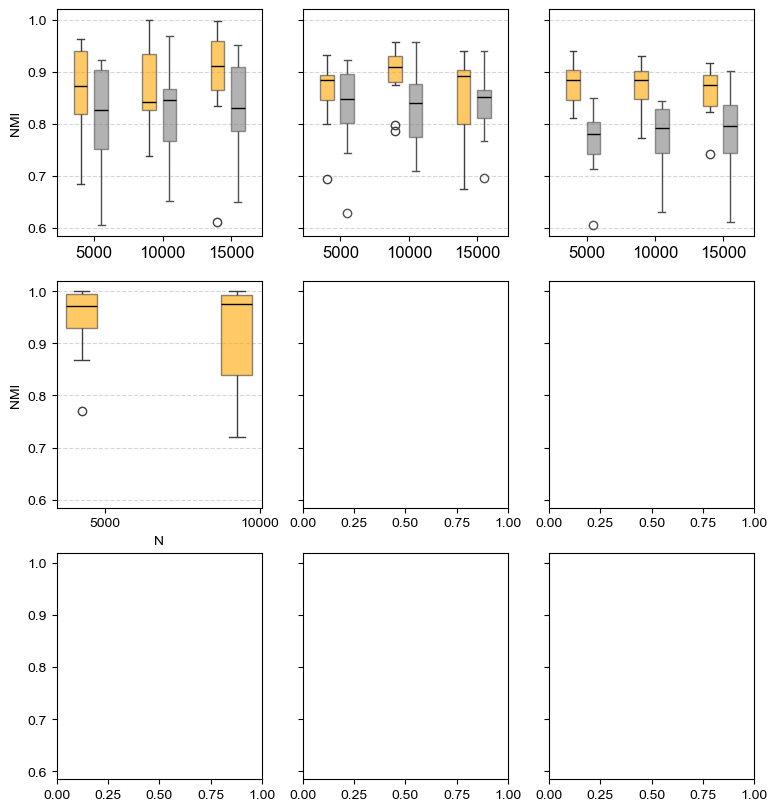

In [11]:
nmi_gmm = []
nmi_pyclone = []
def read_nmi_file(filename):
    try:
        with open(filename, 'r') as file:
            nmi_values = [float(line.strip()) for line in file.readlines()]
        return nmi_values
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        return []


for N in N_values:
    for K in K_values:
        for D in D_values:
            # Construct the filename based on the pattern
            if D == 2:
                filename = os.path.join(general_folder_gmm, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_gmm, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_gmm, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_gmm = read_nmi_file(filename)
            if nmi_values_gmm:
                for nmi in nmi_values_gmm:
                    nmi_gmm.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
            if D == 2:
                filename = os.path.join(general_folder_pyclone, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_pyclone, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_pyclone, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_pyclone = read_nmi_file(filename)
            if nmi_values_pyclone:
                for nmi in nmi_values_pyclone:
                    nmi_pyclone.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })

df_gmm = pd.DataFrame(nmi_gmm)
df_pyclone = pd.DataFrame(nmi_pyclone)
# df
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(9, 10), sharey=True)
axes = axes.flatten()
for i, (D) in enumerate(D_values):
    for j, (K) in enumerate(K_values):
        ax = axes[i * 3 + j]
        ax.grid(True, linestyle="--", alpha=0.5)
        ax.xaxis.grid(True)  # Ensure vertical grid lines
        ax.yaxis.grid(True)  # Ensure horizontal grid lines
        subset_gmm = df_gmm[(df_gmm['K'] == K) & (df_gmm['D'] == D)]
        subset_pyclone = df_pyclone[(df_pyclone['K'] == K) & (df_pyclone['D'] == D)]
        
        
        # Calculate the unique values of N
        unique_n_values = subset_gmm['N'].unique()
        # n_positions_gmm = range(len(unique_n_values))
        # Reduce spacing between groups of N values by using a smaller factor instead of 1.0
        # Reduce spacing between groups of N values
        base_spacing = 1  # Instead of 1.0, making groups closer

        # Reduce the offset between GMM and PyClone to 0.15 instead of 0.2
        inner_offset = 0.15  

        n_positions_gmm = [j * base_spacing - inner_offset for j in range(len(unique_n_values))]
        n_positions_pyclone = [j * base_spacing + inner_offset for j in range(len(unique_n_values))]


        

        # Create the boxplot for GMM with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_gmm, ax=ax,
            positions=n_positions_gmm,
            boxprops=dict(facecolor='orange', alpha=0.6),
            medianprops=dict(color='black'),
            width=0.2
        )

        # Create the boxplot for KMeans with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_pyclone, ax=ax,
            positions=n_positions_pyclone,
            boxprops=dict(facecolor='grey', alpha=0.6),
            medianprops=dict(color='black'),
            width=0.2
        )
        
        
        # Set custom x-tick labels for the combined plot
        ax.set_xticks([pos + 0.2 for pos in n_positions_gmm])  # Center the labels
        ax.set_xticklabels(
            ['5000',  '10000',  '15000'], fontsize=12
        )
        ax.set_xlabel('')
        # ax.set_ylabel('NMI')

for i, K in enumerate(K_values):
    axes[1*i].set_title(f'{K}', fontsize=14)

# For the right column: Number of samples (D = 2, 3, 4)
for i, D in enumerate(D_values):
    # Position each D label on the right side of the subplots, vertically
    fig.text(0.95, 0.84 - i * 0.33, f'{D}', va='center', ha='center', rotation=-90, fontsize=18)

plt.ylim([0.55, 1.01])
fig.text(0.5, 1.03, 'NMI', ha='center', va='center', fontsize=18)
fig.text(0.5, 1., 'Number of clusters', ha='center', va='center', fontsize=16)
fig.text(1., 0.5, 'Number of samples', ha='center', va='center', rotation=-90, fontsize=16)
fig.text(0.5, 0.00001, 'Number of data points', ha='center', fontsize=12)

legend_elements = [
    Patch(facecolor='orange', edgecolor='black', alpha=0.6, label='Our model'),
    Patch(facecolor='grey', edgecolor='black', alpha=0.6, label='PyClone')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

#### ARI

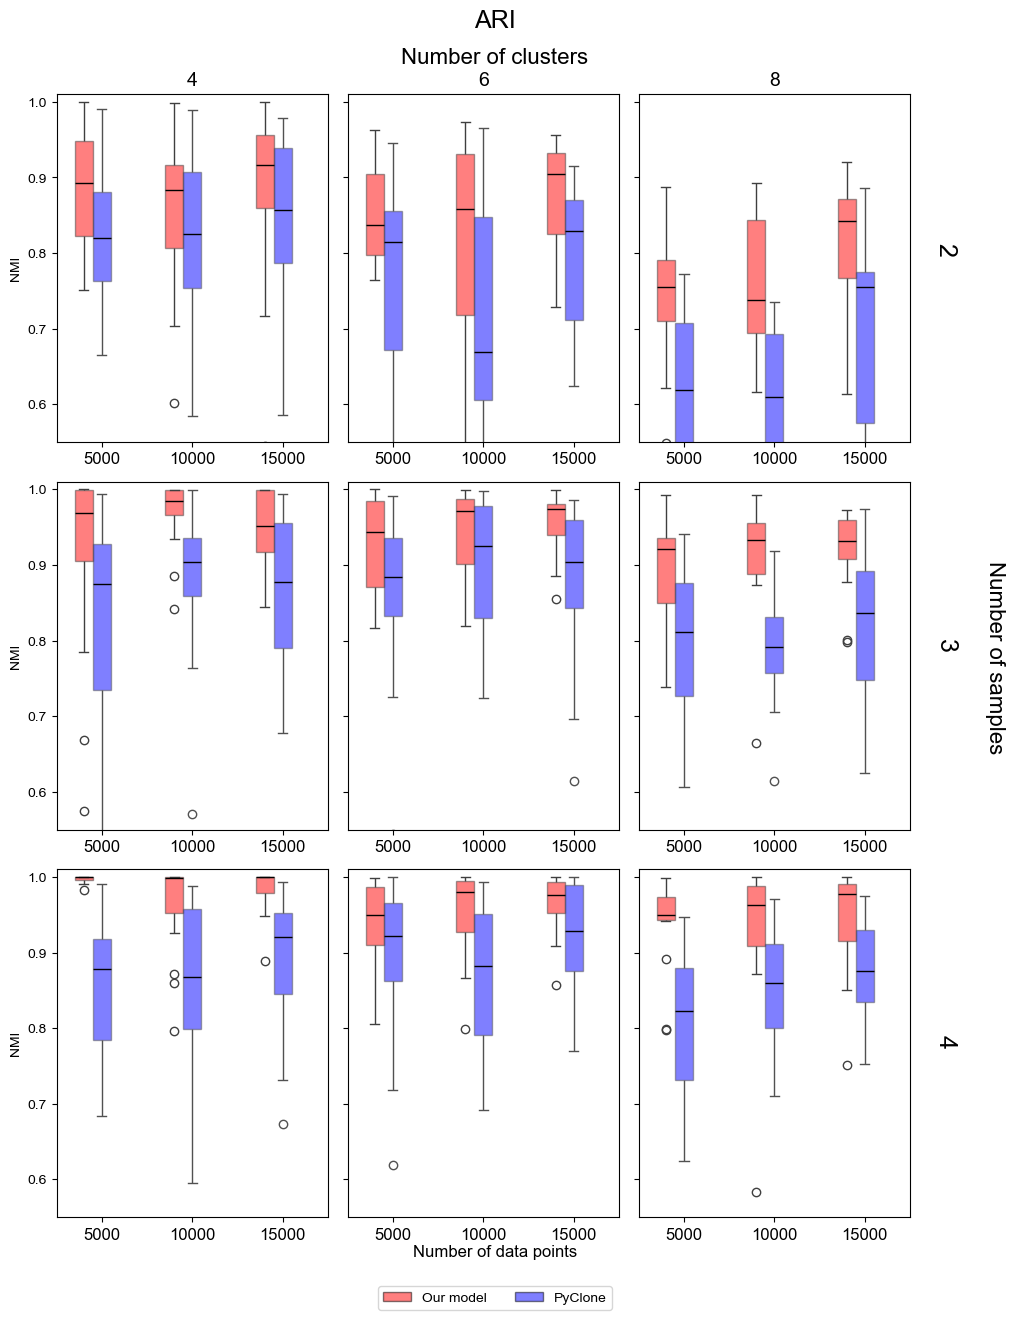

In [7]:
nmi_gmm = []
nmi_pyclone = []
def read_nmi_file(filename):
    try:
        with open(filename, 'r') as file:
            nmi_values = [float(line.strip()) for line in file.readlines()]
        return nmi_values
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        return []

for N in N_values:
    for K in K_values:
        for D in D_values:
            # Construct the filename based on the pattern
            if D == 2:
                filename = os.path.join(general_folder_gmm, f"D_2/ari/ari_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_gmm, f"D_3/ari/ari_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_gmm, f"D_4/ari/ari_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_gmm = read_nmi_file(filename)
            if nmi_values_gmm:
                for nmi in nmi_values_gmm:
                    nmi_gmm.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
            if D == 2:
                filename = os.path.join(general_folder_pyclone, f"D_2/ari/ari_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder_pyclone, f"D_3/ari/ari_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder_pyclone, f"D_4/ari/ari_N_{N}_K_{K}_D_{D}.txt")
            nmi_values_pyclone = read_nmi_file(filename)
            if nmi_values_pyclone:
                for nmi in nmi_values_pyclone:
                    nmi_pyclone.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })

df_gmm = pd.DataFrame(nmi_gmm)
df_pyclone = pd.DataFrame(nmi_pyclone)
# df
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)
axes = axes.flatten()
for i, (D) in enumerate(D_values):
    for j, (K) in enumerate(K_values):
        ax = axes[i * 3 + j]
        subset_gmm = df_gmm[(df_gmm['K'] == K) & (df_gmm['D'] == D)]
        subset_pyclone = df_pyclone[(df_pyclone['K'] == K) & (df_pyclone['D'] == D)]
        
        
        # Calculate the unique values of N
        unique_n_values = subset_gmm['N'].unique()
        # n_positions_gmm = range(len(unique_n_values))
        n_positions_gmm = [pos - 0.2 for pos in range(len(unique_n_values))]
        n_positions_pyclone = [pos + 0.2 for pos in n_positions_gmm]
        

        # Create the boxplot for GMM with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_gmm, ax=ax,
            positions=n_positions_gmm,
            boxprops=dict(facecolor='red', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )

        # Create the boxplot for KMeans with offset positions
        sns.boxplot(
            x='N', y='NMI', data=subset_pyclone, ax=ax,
            positions=n_positions_pyclone,
            boxprops=dict(facecolor='blue', alpha=0.5),
            medianprops=dict(color='black'),
            width=0.2
        )
        
        
        # Set custom x-tick labels for the combined plot
        ax.set_xticks([pos + 0.2 for pos in n_positions_gmm])  # Center the labels
        ax.set_xticklabels(
            ['5000',  '10000',  '15000'], fontsize=12
        )
        ax.set_xlabel('')
        ax.set_ylabel('NMI')

for i, K in enumerate(K_values):
    axes[1*i].set_title(f'{K}', fontsize=14)

# For the right column: Number of samples (D = 2, 3, 4)
for i, D in enumerate(D_values):
    # Position each D label on the right side of the subplots, vertically
    fig.text(0.95, 0.84 - i * 0.33, f'{D}', va='center', ha='center', rotation=-90, fontsize=18)

plt.ylim([0.55, 1.01])
fig.text(0.5, 1.03, 'ARI', ha='center', va='center', fontsize=18)
fig.text(0.5, 1., 'Number of clusters', ha='center', va='center', fontsize=16)
fig.text(1., 0.5, 'Number of samples', ha='center', va='center', rotation=-90, fontsize=16)
fig.text(0.5, 0.00001, 'Number of data points', ha='center', fontsize=12)
# plt.savefig('nmi_gmm.pdf', format='pdf')
# plt.savefig('nmi_gmm.png')

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Our model'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='PyClone')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',  # Position the legend below the plot
    bbox_to_anchor=(0.5, -0.05),  # Center the legend horizontally below the plot
    ncol=3,  # Arrange entries in two columns for horizontal layout
    fontsize=10,  # Font size for the legend labels
)

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

# PyClone

In [7]:
# 3*9*15 = 405 files
true_phi_list = []
true_kappa_list = []
true_alpha_list = []

pred_phi_list = []
pred_kappa_list = []
pred_alpha_list = []

# Regular expression pattern to match the file names and extract N, K, D, and df values
pattern = re.compile(r'N_(\d+)_K_(\d+)_D_(\d+)_df_(\d+)\.csv')
cluster_dist_total = []

mae_phi_py = {f"N_{N}_K_{K}_D_{D}": [] for N in N_values for K in K_values for D in D_values}

true_phi_dic_py = []
pred_phi_dic_py = []


idx = 0
for dim in D_values:
    directory = general_folder_pyclone + f"D_{dim}/csv"
    for filename in os.listdir(directory):
        # Check if the file matches the pattern
        match = pattern.match(filename)
        if match:
            # Extract N, K, D, and df values from the file name
            N, K, D, df = map(int, match.groups())
            if df < 15:
                print('idx: ', idx, 'N ', N, 'K ', K, 'D ', D, 'idx ',df)
                idx+=1
                file_path = os.path.join(directory, filename)
                df_data = pd.read_csv(file_path)
                if 'True_cluster' in df_data.columns and 'Pred_cluster' in df_data.columns:
                    true_labels = df_data['True_cluster'].tolist()
                    pred_labels = df_data['Pred_cluster'].tolist()

                    nmi_threshold = 0.4 # 0.5
                    label_mapping, nmi_matrix = compute_pairwise_nmi(true_labels, pred_labels, threshold=nmi_threshold)
                    true_labels_match = list(label_mapping.keys())
                    pred_labels_match = list(label_mapping.values())

                    # Extract true and predicted distributions from the csv
                    true_dist = df_data['True_distribution'].apply(ast.literal_eval)
                    true_dist = torch.tensor(true_dist, dtype=torch.int)
                    
                    """
                    COMPUTE VALUES WITH MATCHED CLUSTERS
                    """
                    first_occurrence_indices_true = [true_labels.index(label) for label in true_labels_match]
                    true_dist_match = true_dist[first_occurrence_indices_true].ravel()
                    
                    first_occurrence_indices_pred = [pred_labels.index(label) for label in pred_labels_match]
                    # pred_dist_match = pred_dist[first_occurrence_indices_pred].ravel()
                    
                    true_phi = torch.tensor(df_data['True_phi'].apply(ast.literal_eval), dtype=torch.float)
                    pred_phi = torch.tensor(df_data['Pred_phi'].apply(ast.literal_eval), dtype=torch.float)
                    true_phi = true_phi[first_occurrence_indices_true].ravel()
                    pred_phi = pred_phi[first_occurrence_indices_pred].ravel()
                    
                    diff_phi = []
                    
                    for p in range(len(true_dist_match)):
                        if true_dist_match[p] == 1: # beta
                            diff_phi.append(np.abs(true_phi[p].item() - pred_phi[p].item()))
                            true_phi_dic_py.append(true_phi[p].item())
                            pred_phi_dic_py.append(pred_phi[p].item())
                        
                    
                    if len(diff_phi) > 0:
                        mae_phi_py[f"N_{N}_K_{K}_D_{D}"].append(np.mean(diff_phi))
                   
# metrics_data

idx:  0 N  10000 K  6 D  2 idx  2
idx:  1 N  15000 K  8 D  2 idx  0
idx:  2 N  15000 K  4 D  2 idx  4
idx:  3 N  15000 K  4 D  2 idx  7
idx:  4 N  10000 K  4 D  2 idx  4
idx:  5 N  10000 K  8 D  2 idx  13
idx:  6 N  5000 K  6 D  2 idx  0
idx:  7 N  10000 K  4 D  2 idx  5
idx:  8 N  15000 K  4 D  2 idx  11
idx:  9 N  15000 K  4 D  2 idx  2
idx:  10 N  5000 K  8 D  2 idx  4
idx:  11 N  10000 K  8 D  2 idx  8
idx:  12 N  15000 K  4 D  2 idx  14
idx:  13 N  10000 K  8 D  2 idx  5
idx:  14 N  15000 K  8 D  2 idx  14
idx:  15 N  5000 K  8 D  2 idx  13
idx:  16 N  10000 K  6 D  2 idx  11
idx:  17 N  10000 K  6 D  2 idx  9
idx:  18 N  5000 K  4 D  2 idx  5
idx:  19 N  5000 K  4 D  2 idx  3
idx:  20 N  15000 K  6 D  2 idx  7
idx:  21 N  10000 K  8 D  2 idx  6
idx:  22 N  15000 K  8 D  2 idx  12
idx:  23 N  10000 K  4 D  2 idx  11
idx:  24 N  10000 K  6 D  2 idx  5
idx:  25 N  5000 K  8 D  2 idx  9
idx:  26 N  15000 K  6 D  2 idx  9
idx:  27 N  10000 K  6 D  2 idx  4
idx:  28 N  5000 K  8 D  2 i

/var/folders/z4/6ll9fb5s3k52m037sj27846c0000gn/T/ipykernel_19959/2616983163.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


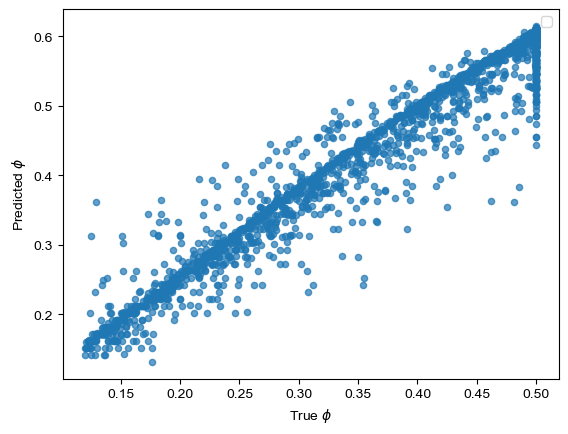

In [12]:
# true_phi_py = [item for sublist in true_phi_dic_py for item in sublist]
# pred_phi_py = [item for sublist in pred_phi_dic_py for item in sublist]

plt.scatter(true_phi_dic_py, pred_phi_dic_py, alpha = 0.7, s = 20)
# slope, intercept = np.polyfit(true_phi_list, pred_phi_list, 1)

# regression_line = [slope * x + intercept for x in true_phi_list]

# plt.plot(true_phi_list, regression_line, color='red', linewidth = 1,label=f'y={slope:.2f}x+{intercept:.2f}')

plt.xlabel(f'True $\\phi$')
plt.ylabel('Predicted $\\phi$')
plt.legend()
# plt.xlim([0.8, 1.6])
# plt.ylim([0.8, 1.6])
plt.show()